Actividad: Problemas de regresión

X1 - Adult mortality
X2 - Infant deaths
X3 - Alcohol
X4 - Percentage expenditure
X5 - Hepatitis B
X6 - Measles
X7 - BMI
X8 - Under-five deaths
X9 - Polio
X10 - Total expenditure
X11 - Diphtheria
X12 - HIV/AIDS   
X13 - GDP
X14 - Population
X15 - Thinness  1-19 years
X16 - Thinness 5-9 years
X17 - Income composition of resources
X18 - Schooling


Para este conjunto de datos:

Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('C:\\Users\\PC\\Documents\\Python\\Actividad1_Regresión\\life_expectancy_data.csv')


In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

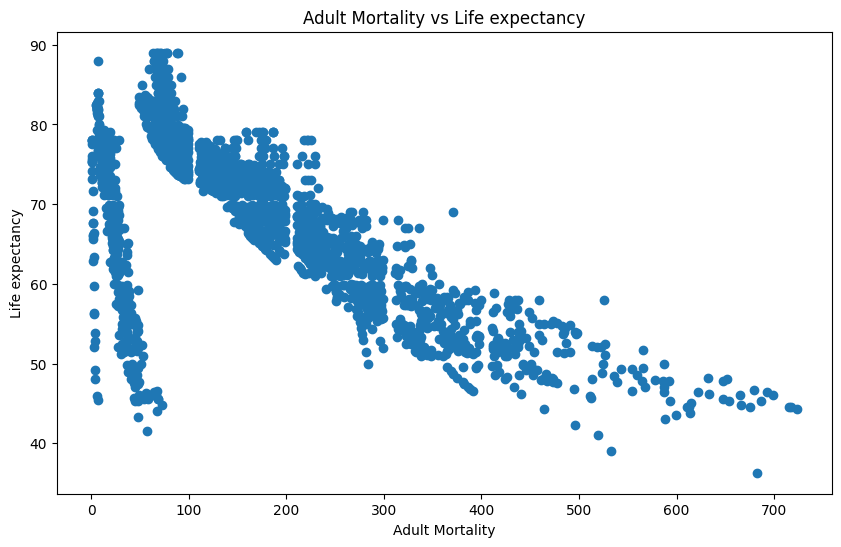

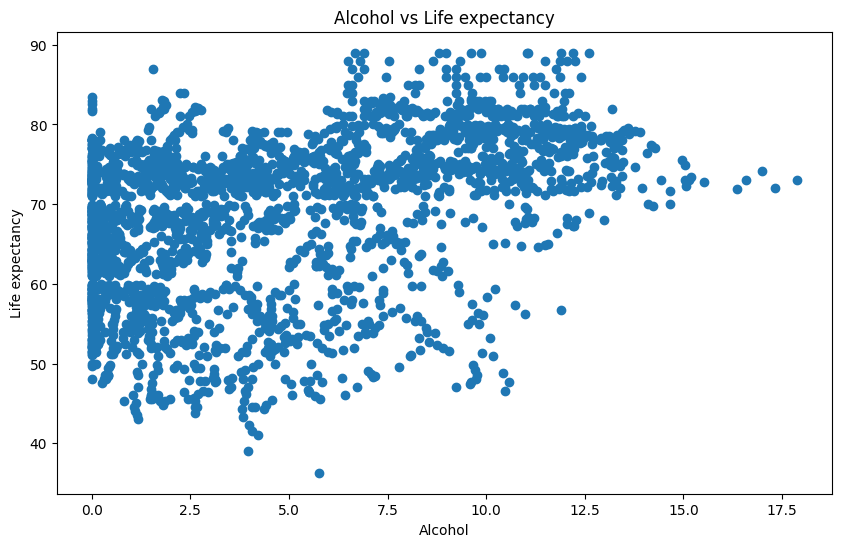

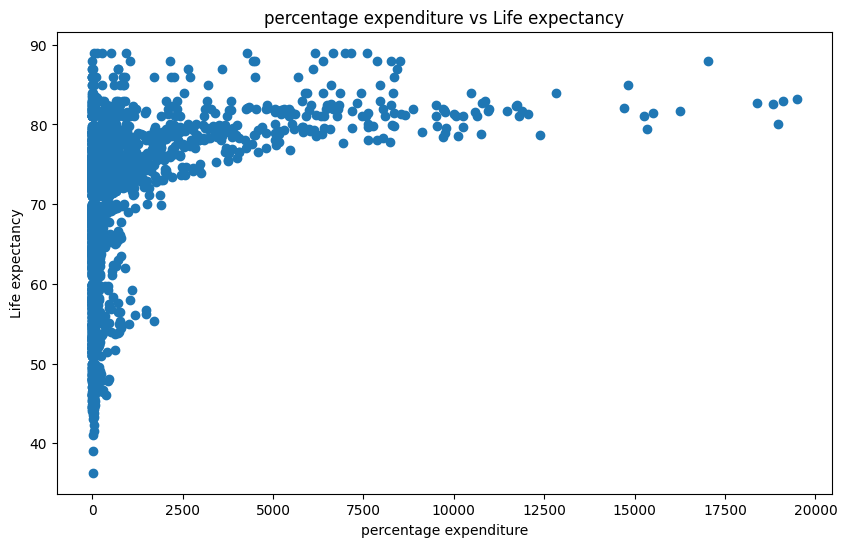

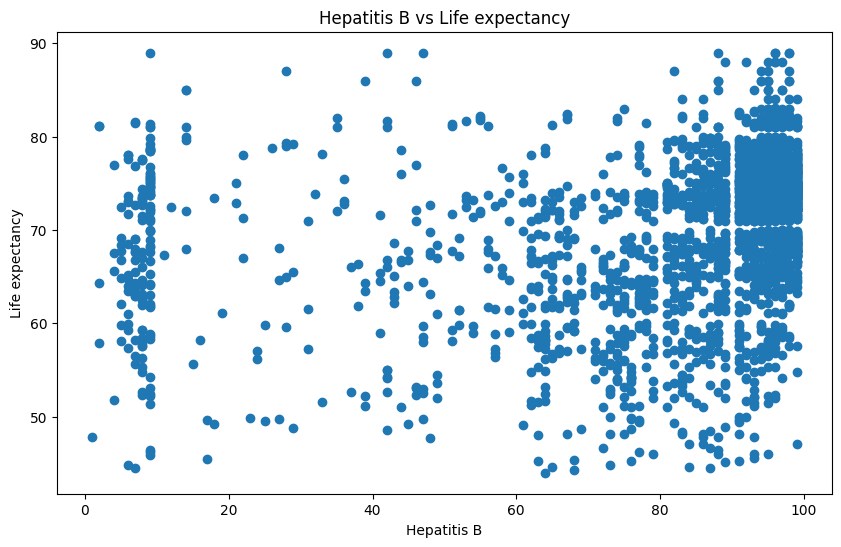

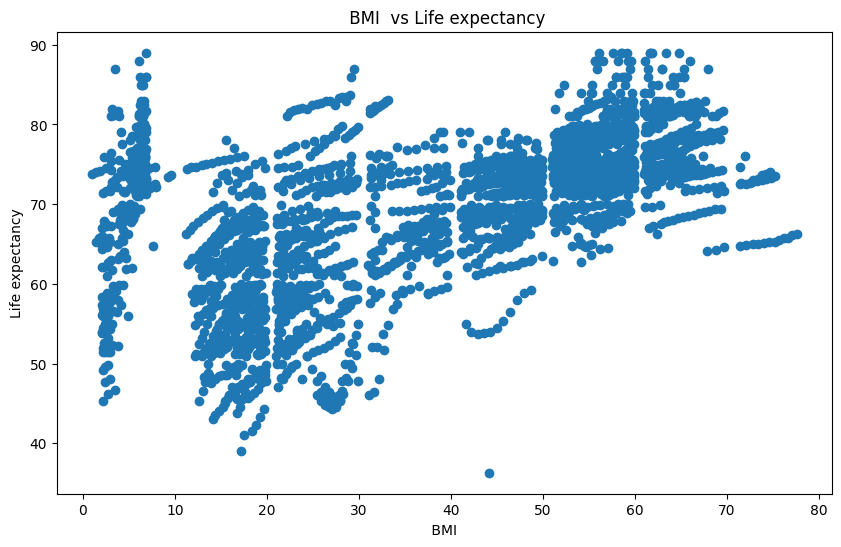

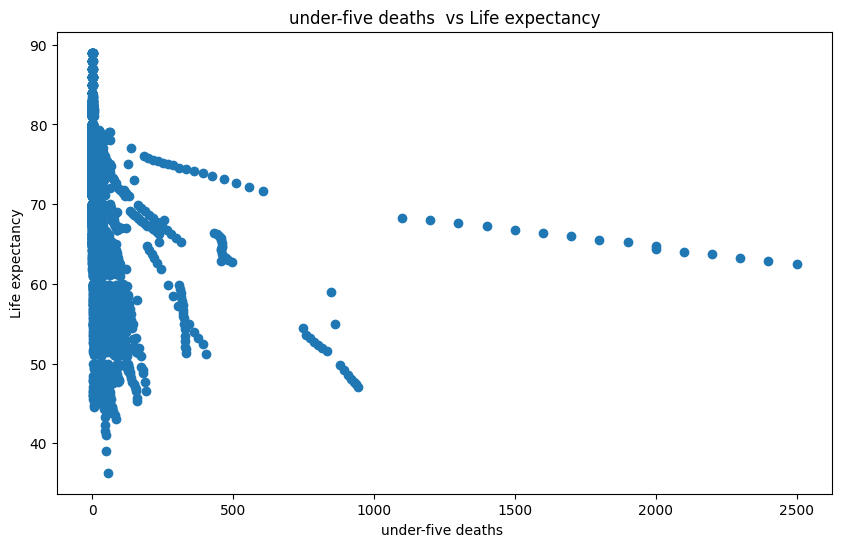

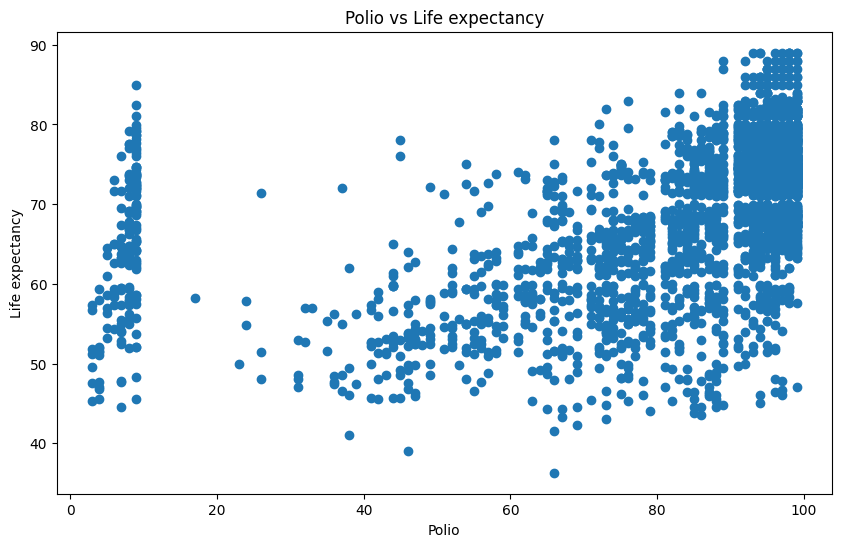

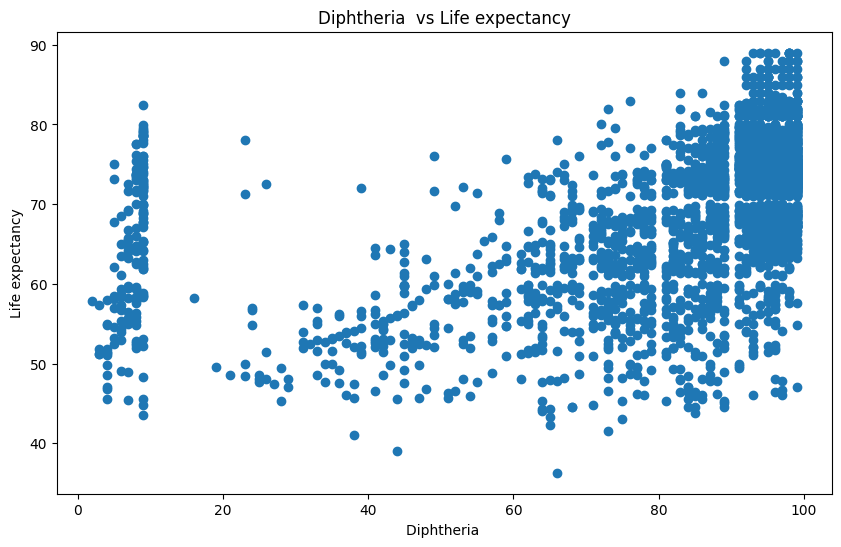

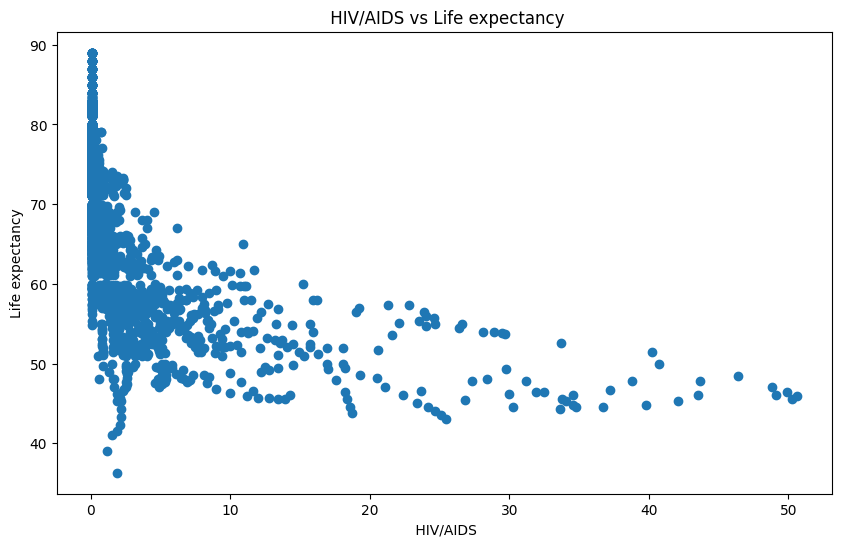

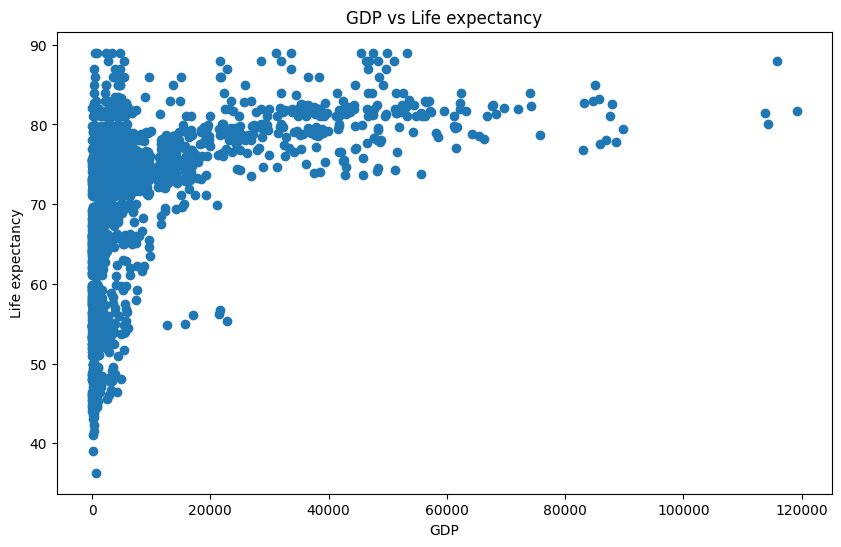

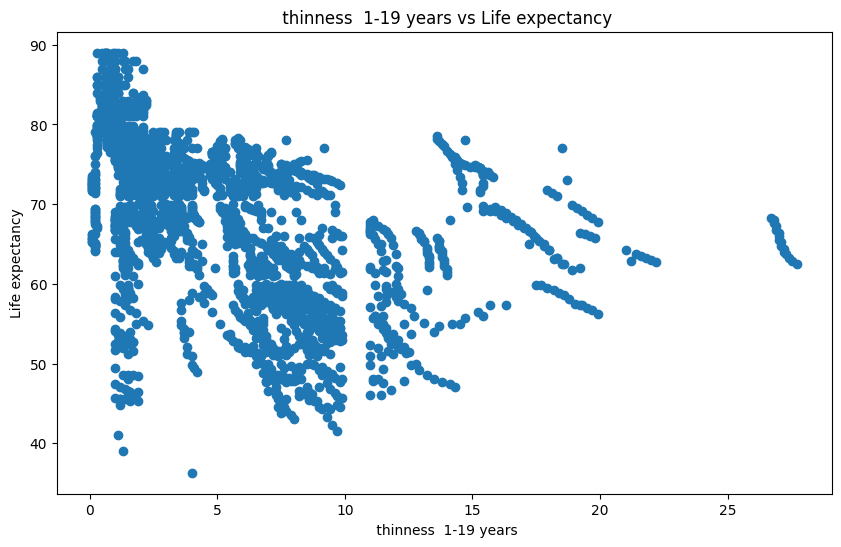

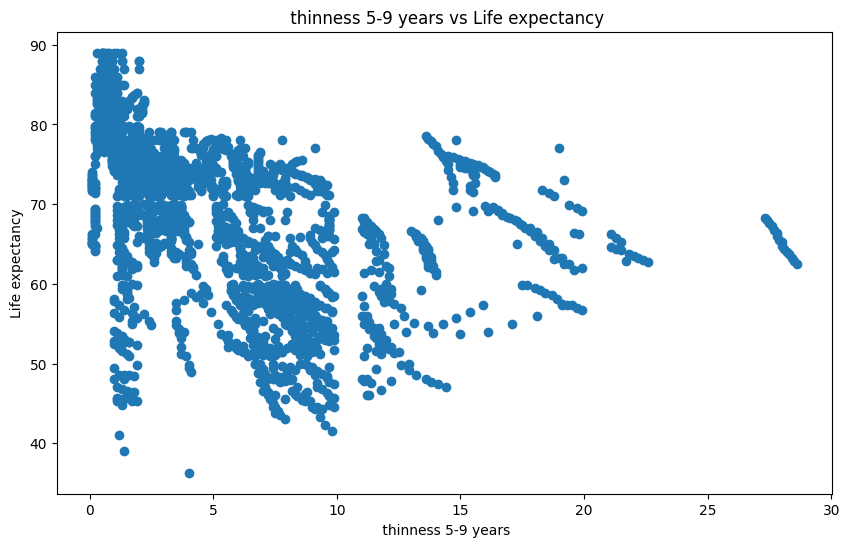

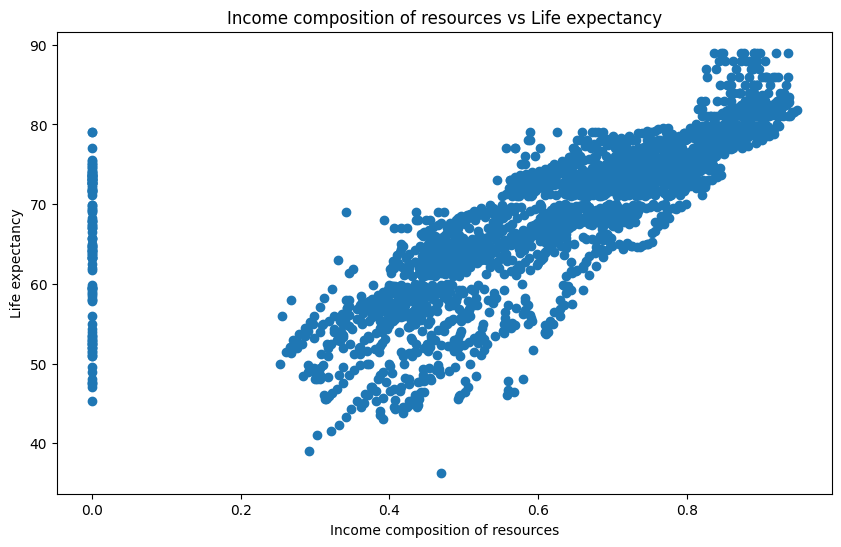

In [9]:
for x in ['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources']:
  plt.figure(figsize=(10, 6))
  plt.scatter(df[x], df['Life expectancy '])
  plt.xlabel(x)
  plt.ylabel('Life expectancy')
  plt.title(f'{x} vs Life expectancy')
  plt.show()


In [10]:
#Eliiminar los datos invalidos para poder trabajar con el dataset
df = df.dropna()
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


2. Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.

In [11]:
x = df[['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources']]
y = df['Life expectancy ']

# Agregar una columna de unos para el término constante (intercepto)
x = np.column_stack((np.ones(x.shape[0]), x))

# Convertir a matrices numpy
X = np.array(x)
Y = np.array(y).reshape(-1, 1)

# Calcular los coeficientes usando la fórmula cerrada
beta = np.linalg.inv(X.T @ X) @ (X.T @ Y)

print("Coeficientes estimados:")
print(beta)

Coeficientes estimados:
[[ 5.74413180e+01]
 [-1.96994569e-02]
 [ 3.45870007e-02]
 [ 2.44581955e-04]
 [-5.27410042e-03]
 [ 5.50687685e-02]
 [-2.59113222e-03]
 [ 1.74407273e-02]
 [ 2.34737374e-02]
 [-4.32085448e-01]
 [ 5.05043308e-05]
 [-6.25244236e-02]
 [ 1.05458390e-02]
 [ 1.69019221e+01]]


3. Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.

Model coefficients:  [ 5.74413180e+01 -1.96994569e-02  3.45870007e-02  2.44581955e-04
 -5.27410042e-03  5.50687685e-02 -2.59113222e-03  1.74407273e-02
  2.34737374e-02 -4.32085448e-01  5.05043308e-05 -6.25244236e-02
  1.05458390e-02  1.69019221e+01]


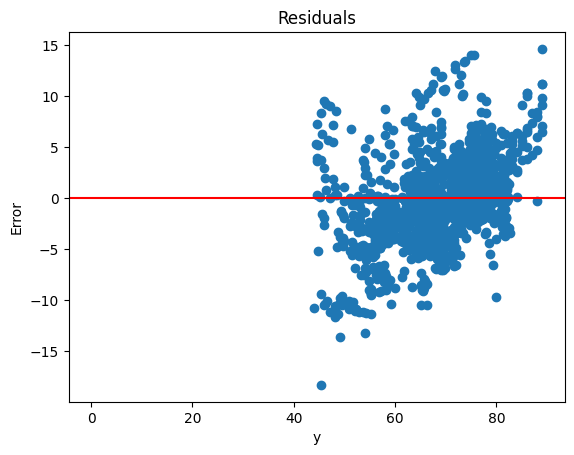

MSE:  15.343889269387896
MAE:  2.920810131870668
R^2:  0.8015979765077403
MSE: 15.953898394090022   MAE: 2.962361920840495   R^2: 0.7902975953049335


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fit model function (it fits a linear model using the specified data set).
def fit_model(X, y):
    return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

# Predict function (it evaluates an array of observations using the specified linear model).
def predict(X, beta):
    return X @ beta

# Seleccionar variables independientes y la variable dependiente
X_columns = ['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources']
X = df[X_columns].values

# Añadir columna de unos para el término independiente (intercepto)
X = np.column_stack((np.ones(X.shape[0]), X))

y = df['Life expectancy '].values

# Ajustar modelo
beta = fit_model(X, y)
print("Model coefficients: ", beta)

# Evaluar residuos
y_pred = predict(X, beta)
r = y - y_pred

# Graficar residuos
plt.scatter(y, r)
plt.axline((0, 0), slope=0, color='red')
plt.xlabel('y')
plt.ylabel('Error')
plt.title('Residuals')
plt.show()

# Calcular MSE, MAE y R^2 con el conjunto de entrenamiento
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

# Evaluar modelo con validación cruzada
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

mse_cv = []
mae_cv = []
r2_cv = []
for train_index, test_index in kf.split(X):

    # Fase de entrenamiento
    X_train = X[train_index, :]
    y_train = y[train_index]

    beta_cv = fit_model(X_train, y_train)

    # Fase de prueba
    X_test = X[test_index, :]
    y_test = y[test_index]

    y_pred = predict(X_test, beta_cv)

    # Calcular MSE, MAE y R^2
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))


In [13]:
df[X_columns].columns

Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS',
       'GDP', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources'],
      dtype='object')

4. Utiliza validación cruzada de Monte Carlo con 1000 iteraciones para encontrar histogramas de R2, MSE y MAE.

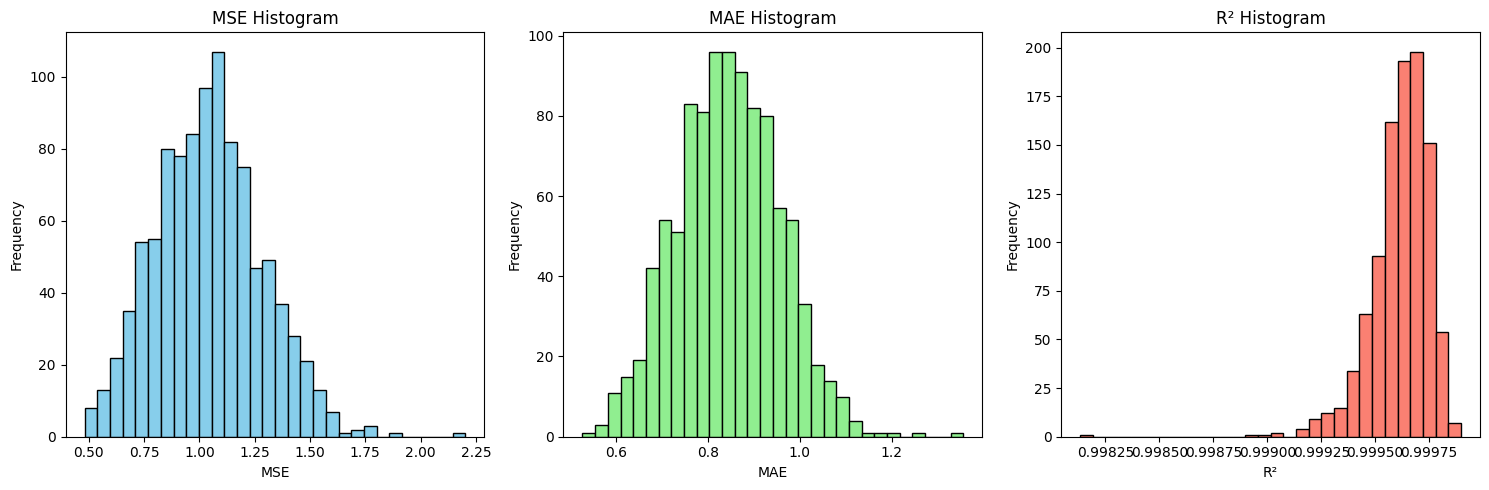

MSE: Mean = 1.0444, Std = 0.2403
MAE: Mean = 0.8446, Std = 0.1130
R²: Mean = 0.9996, Std = 0.0001


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fit model function (it fits a linear model using the specified data set).
def fit_model(X, y):
    return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

# Predict function (it evaluates an array of observations using the specified linear model).
def predict(X, beta):
    return X @ beta

# Generate data
x = np.random.uniform(0, 10, (100, 4))
X = np.column_stack((np.ones(x.shape[0]), x))

beta_real = [5, -3, 4, 15, 10]
y = X @ beta_real + np.random.normal(0, 1, 100)

# Monte Carlo cross-validation with 1000 iterations
n_iterations = 1000
test_size = 0.2  # 20% for testing
mse_mc = []
mae_mc = []
r2_mc = []

for _ in range(n_iterations):
    # Randomly split the data into train and test sets
    indices = np.random.permutation(len(y))
    test_size_n = int(len(y) * test_size)
    test_indices = indices[:test_size_n]
    train_indices = indices[test_size_n:]

    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]

    # Train the model
    beta_mc = fit_model(X_train, y_train)

    # Test the model
    y_pred = predict(X_test, beta_mc)

    # Calculate metrics
    mse_i = mean_squared_error(y_test, y_pred)
    mse_mc.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    mae_mc.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    r2_mc.append(r2_i)

# Plot histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(mse_mc, bins=30, color='skyblue', edgecolor='black')
plt.title('MSE Histogram')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mae_mc, bins=30, color='lightgreen', edgecolor='black')
plt.title('MAE Histogram')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(r2_mc, bins=30, color='salmon', edgecolor='black')
plt.title('R² Histogram')
plt.xlabel('R²')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print mean and standard deviation of metrics
print(f'MSE: Mean = {np.mean(mse_mc):.4f}, Std = {np.std(mse_mc):.4f}')
print(f'MAE: Mean = {np.mean(mae_mc):.4f}, Std = {np.std(mae_mc):.4f}')
print(f'R²: Mean = {np.mean(r2_mc):.4f}, Std = {np.std(r2_mc):.4f}')


5. Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de MSE y MAE. ¿Los histogramas son distintos a los obtenidos con el método de Monte Carlo?
Utilizando el método de Leave-One-Out vemos que los histogramas son bastante distintos que los del método Monte Carlo ya que en este caso no tenemos un valor ni un histograma de R2 y los datos parecen estar más inclinados hacía una parte de la gráfica en vez de ser una distribución normal como campana en el Monte Carlo.

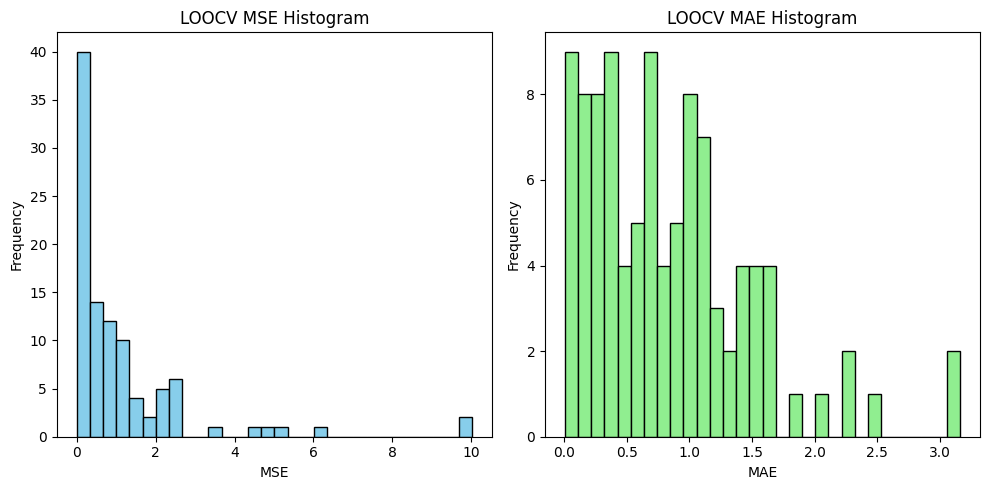

LOOCV MSE: Mean = 1.1239, Std = 1.7225
LOOCV MAE: Mean = 0.8370, Std = 0.6506


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import LeaveOneOut

# Fit model function (it fits a linear model using the specified data set).
def fit_model(X, y):
    return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

# Predict function (it evaluates an array of observations using the specified linear model).
def predict(X, beta):
    return X @ beta

# Generate data
x = np.random.uniform(0, 10, (100, 4))
X = np.column_stack((np.ones(x.shape[0]), x))

beta_real = [5, -3, 4, 15, 10]
y = X @ beta_real + np.random.normal(0, 1, 100)

# LOOCV
loo = LeaveOneOut()
mse_loocv = []
mae_loocv = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    beta_loocv = fit_model(X_train, y_train)

    # Test the model
    y_pred = predict(X_test, beta_loocv)

    # Calculate metrics
    mse_i = mean_squared_error(y_test, y_pred)
    mse_loocv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    mae_loocv.append(mae_i)

# Plot histograms for LOOCV
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(mse_loocv, bins=30, color='skyblue', edgecolor='black')
plt.title('LOOCV MSE Histogram')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(mae_loocv, bins=30, color='lightgreen', edgecolor='black')
plt.title('LOOCV MAE Histogram')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print mean and standard deviation of metrics for LOOCV
print(f'LOOCV MSE: Mean = {np.mean(mse_loocv):.4f}, Std = {np.std(mse_loocv):.4f}')
print(f'LOOCV MAE: Mean = {np.mean(mae_loocv):.4f}, Std = {np.std(mae_loocv):.4f}')


In [16]:
normal_df =['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources']

6. Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, X112, X132), así como los productos entre pares de variables (por ejemplo, X1xX2, X3xX4). Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.

In [17]:
x1 = df[X_columns]
# Crear nuevas columnas elevando al cuadrado cada una de las variables en 'x'
for column in x1.columns:
    df[column + '_squared'] = df[column] ** 2

# Crear nuevas columnas para los productos entre pares de variables
df['Adult Mortality * Alcohol'] = df['Adult Mortality'] * df['Alcohol']
df['Alcohol * percentage expenditure'] = df['Alcohol'] * df['percentage expenditure']
df['Hepatitis B * BMI'] = df['Hepatitis B'] * df[' BMI ']
df['under-five deaths * Polio'] = df['under-five deaths '] * df['Polio']
df['Diphtheria * HIV/AIDS'] = df['Diphtheria '] * df[' HIV/AIDS']
df['GDP * thinness 1-19 years'] = df['GDP'] * df[' thinness  1-19 years']
df['thinness 5-9 years * Income composition of resources'] = df[' thinness 5-9 years'] * df['Income composition of resources']

print(df.head())


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

    thinness  1-19 years_squared   thinness 5-9 years_squared  \
0                    

In [18]:
new_df = ['Adult Mortality_squared', 'Alcohol_squared', 'percentage expenditure_squared', 'Hepatitis B_squared',
       ' BMI _squared', 'under-five deaths _squared', 'Polio_squared',
       'Diphtheria _squared', ' HIV/AIDS_squared', 'GDP_squared',
       ' thinness  1-19 years_squared', ' thinness 5-9 years_squared',
       'Income composition of resources_squared',
       'Adult Mortality * Alcohol', 'Alcohol * percentage expenditure',
       'Hepatitis B * BMI', 'under-five deaths * Polio',
       'Diphtheria * HIV/AIDS', 'GDP * thinness 1-19 years',
       'thinness 5-9 years * Income composition of resources']

In [19]:
normal_df = ['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources']

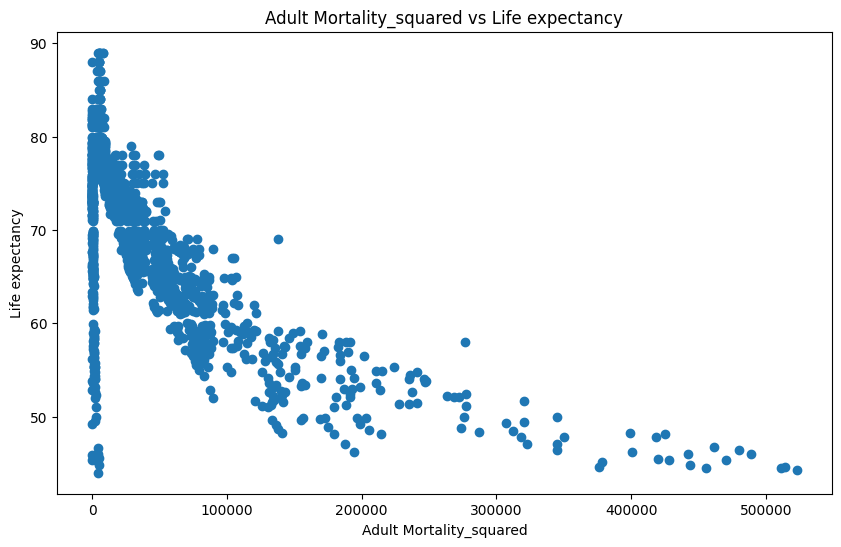

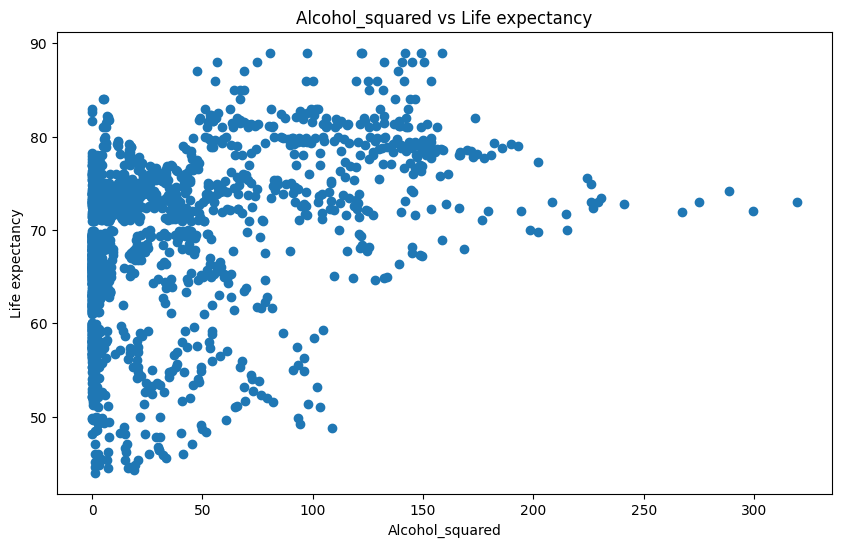

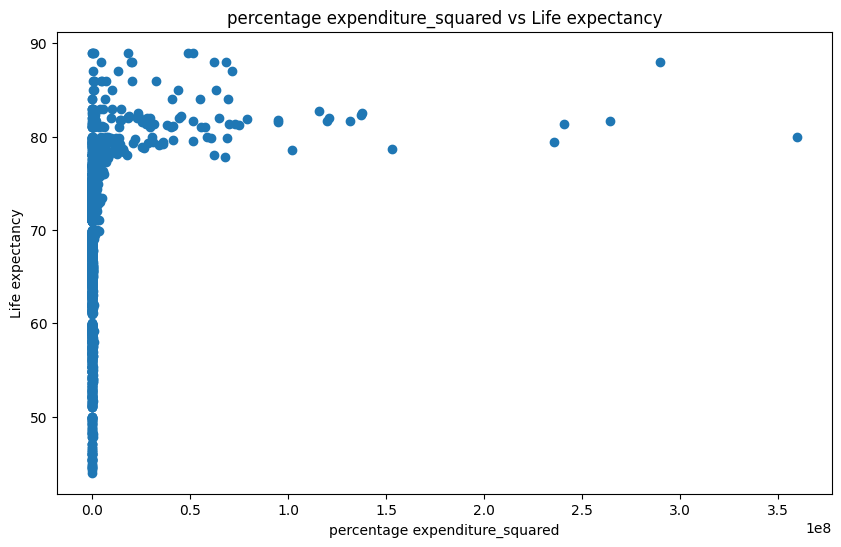

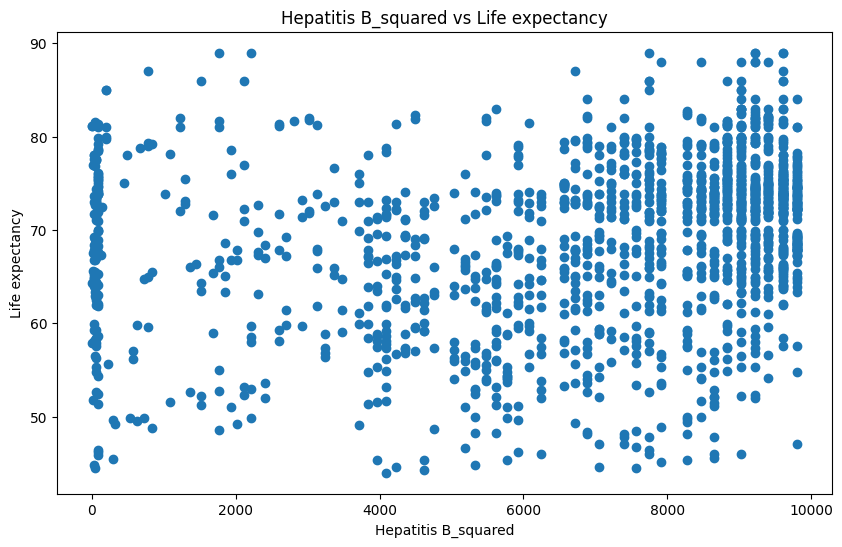

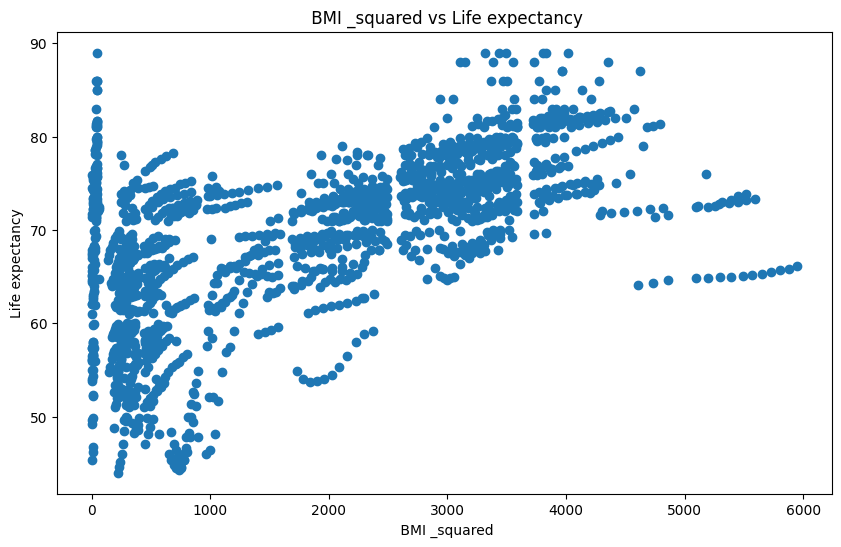

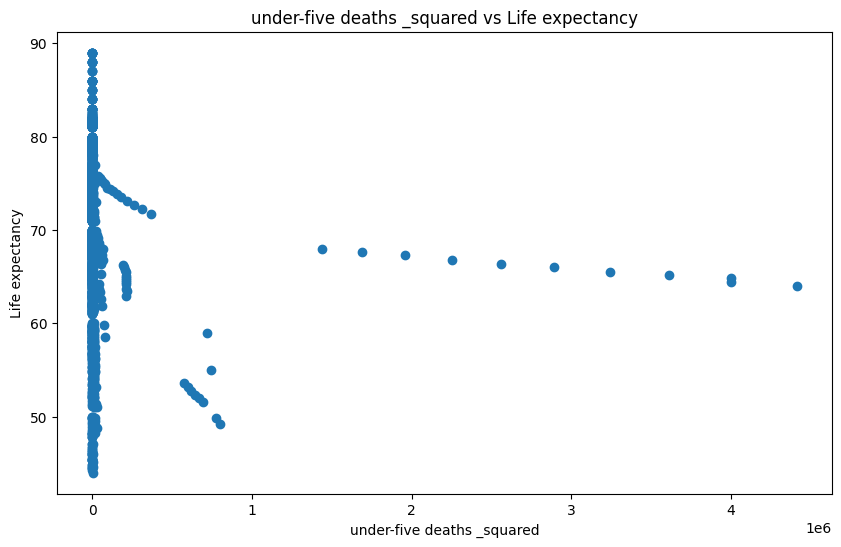

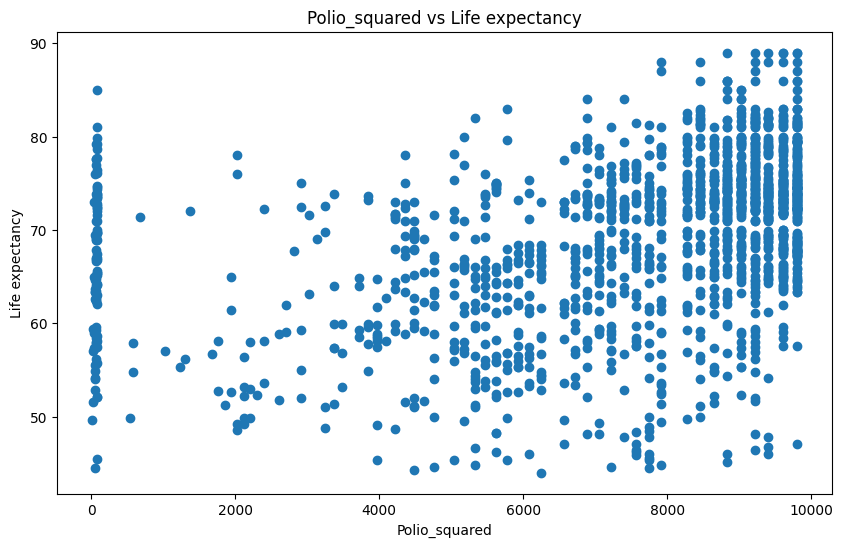

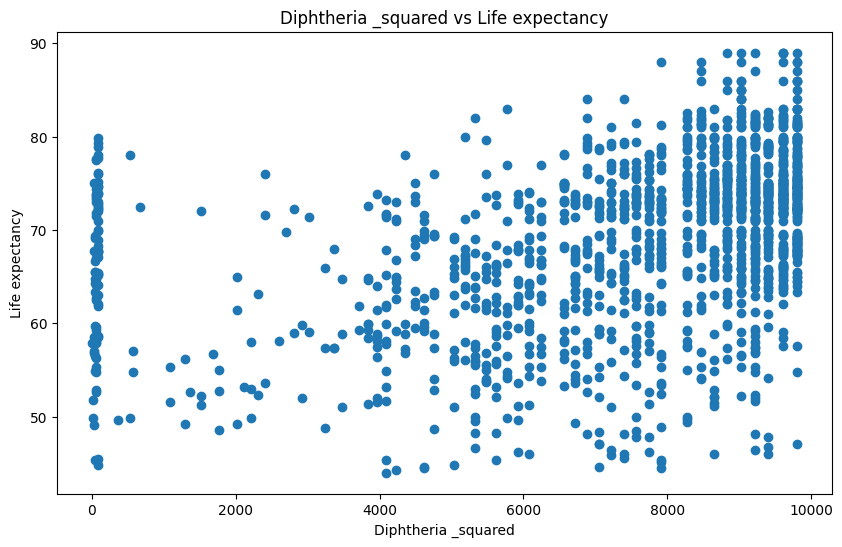

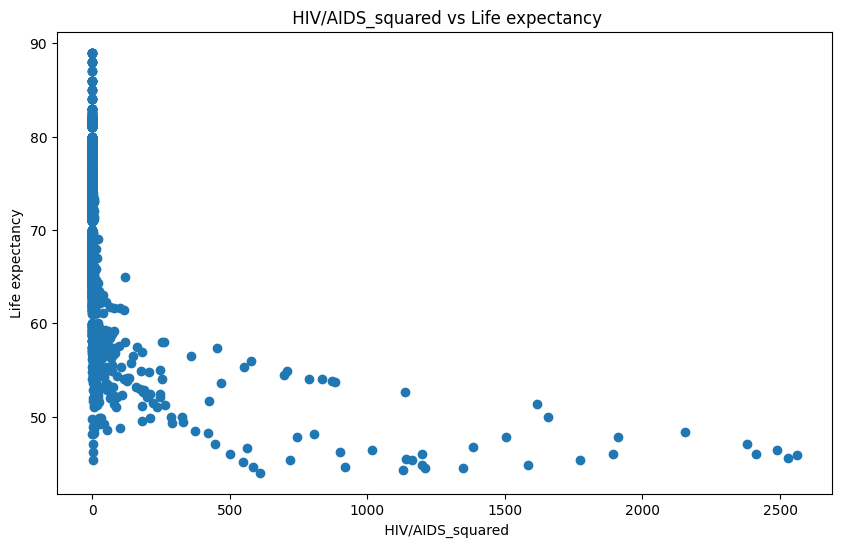

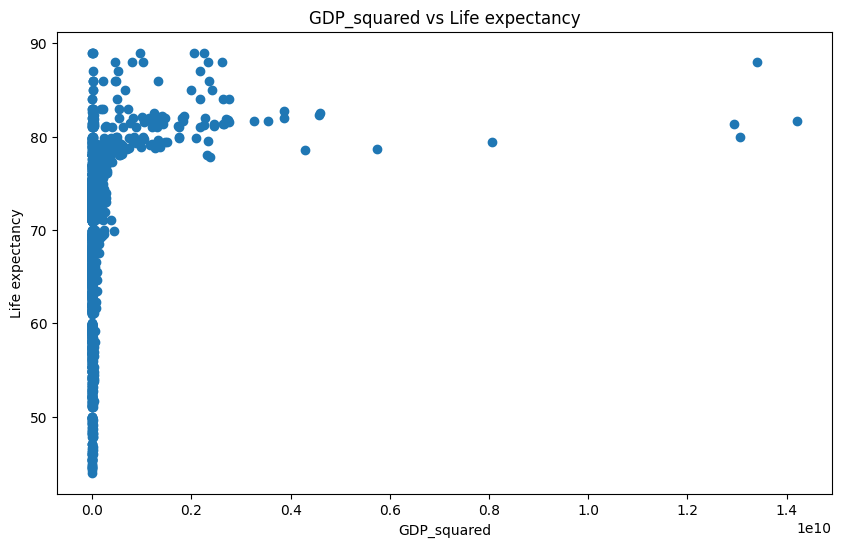

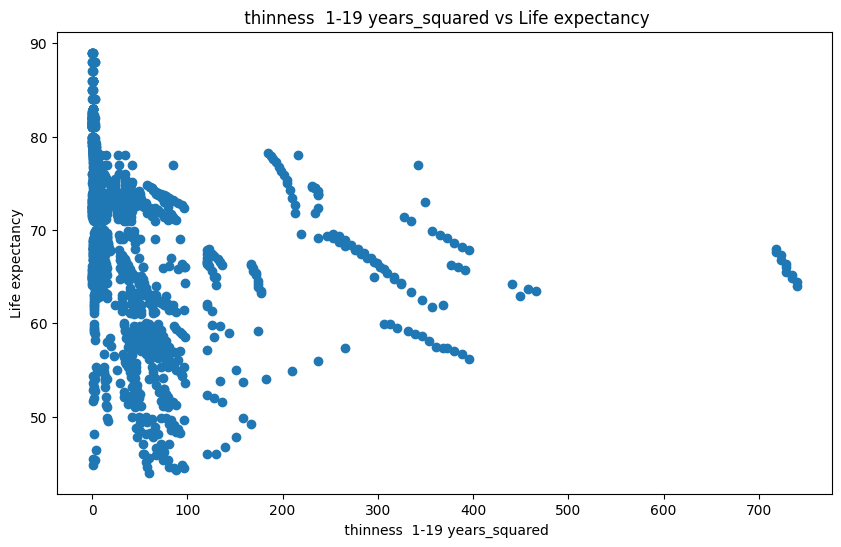

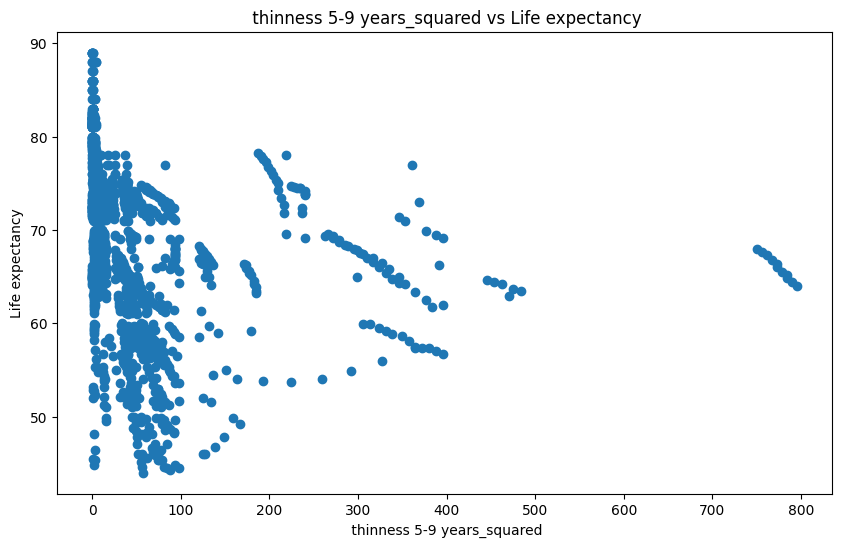

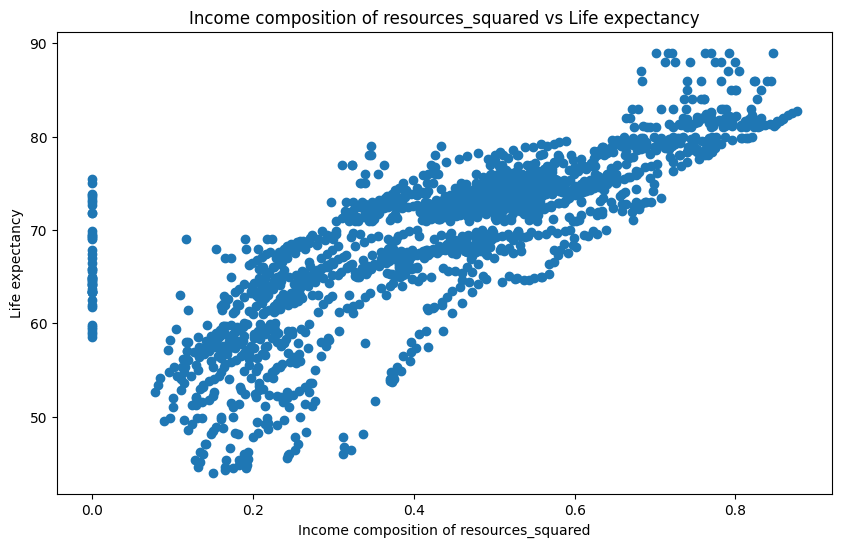

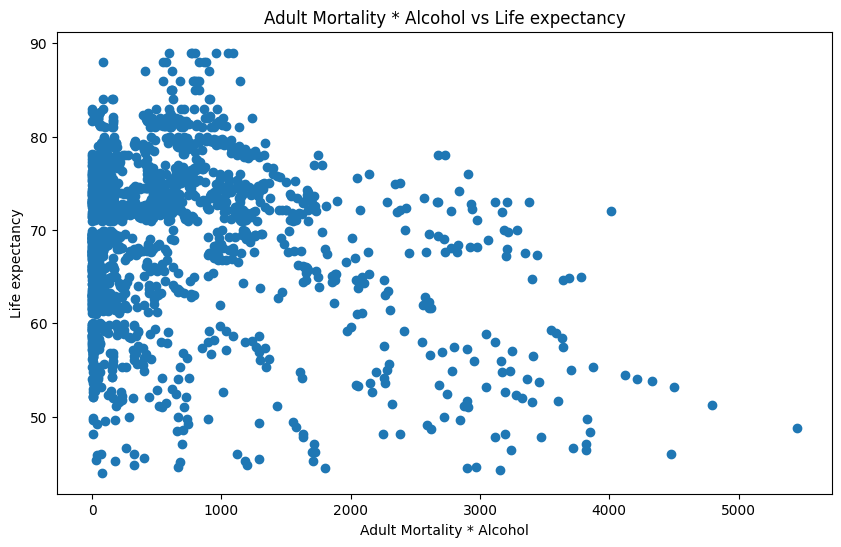

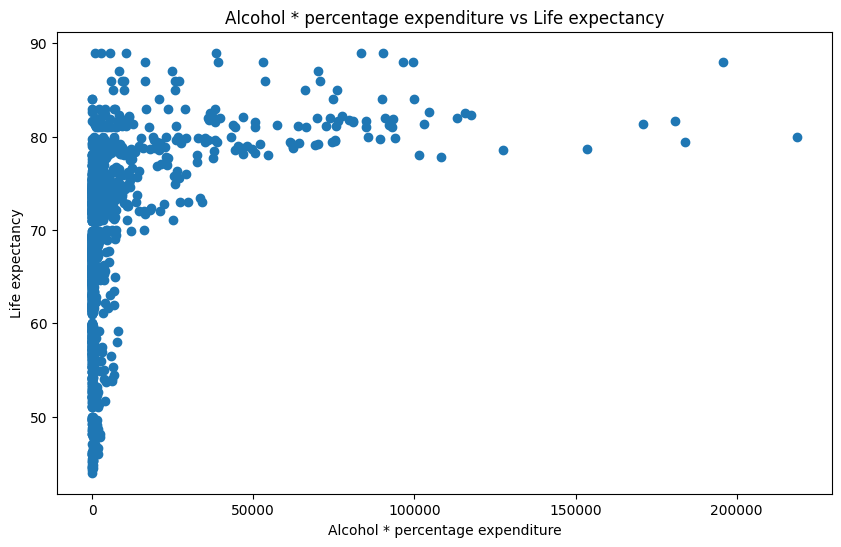

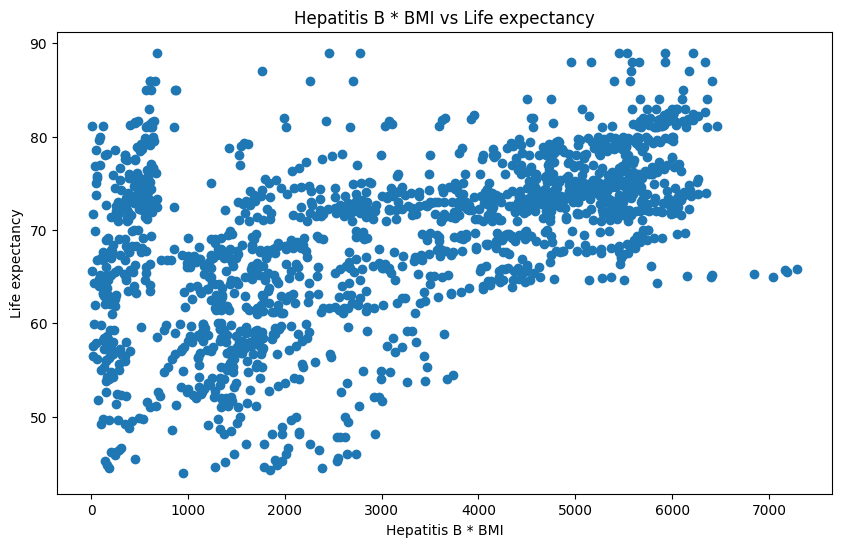

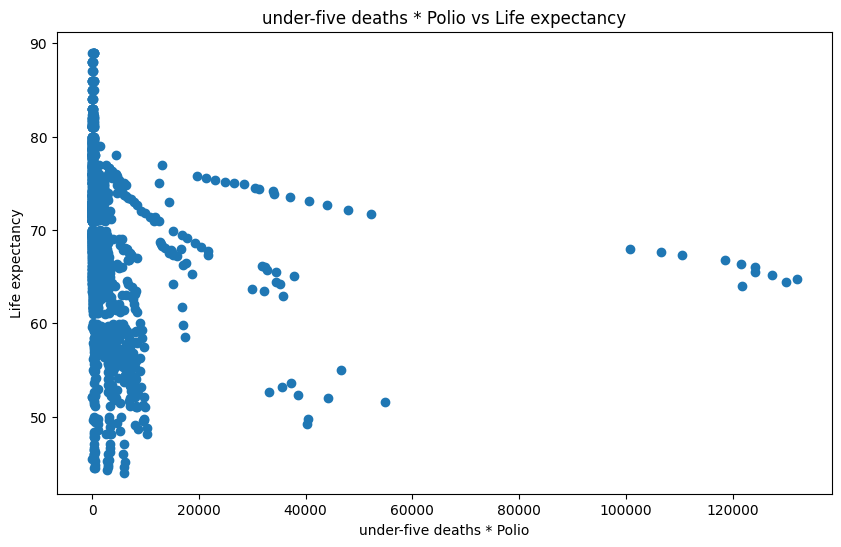

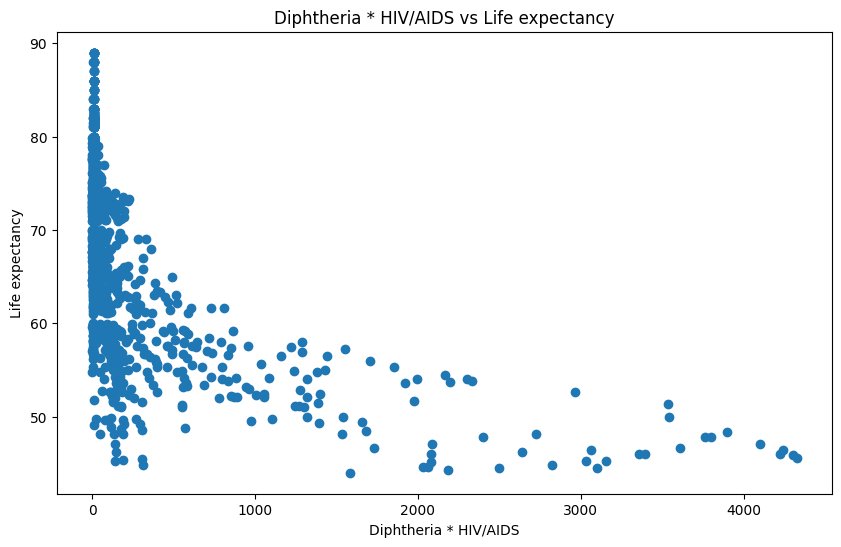

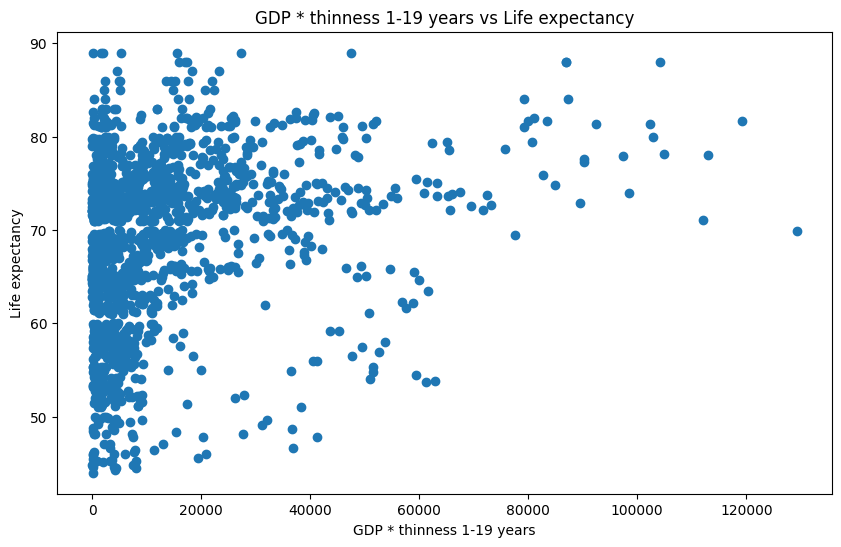

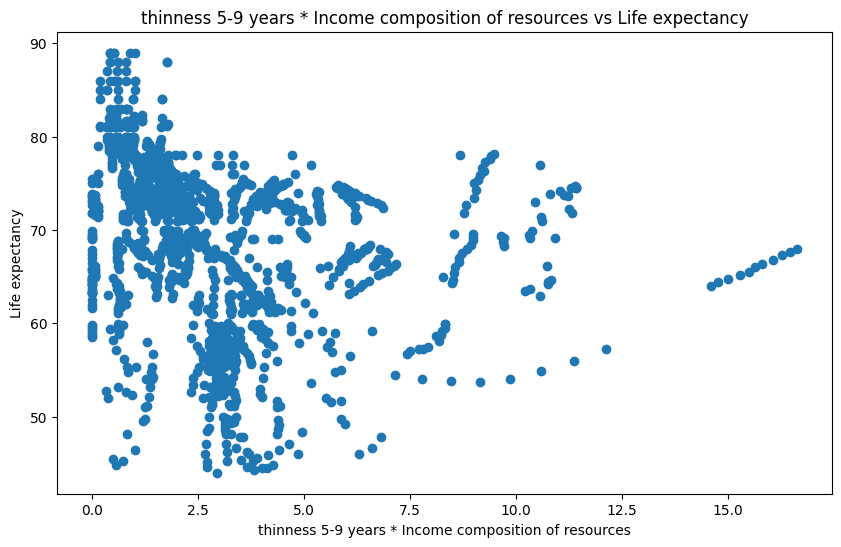

In [20]:

for x in new_df:
  plt.figure(figsize=(10, 6))
  plt.scatter(df[x], df['Life expectancy '])
  plt.xlabel(x)
  plt.ylabel('Life expectancy')
  plt.title(f'{x} vs Life expectancy')
  plt.show()


In [21]:
x = df[new_df]
y = df['Life expectancy ']

# Agregar una columna de unos para el término constante (intercepto)
x = np.column_stack((np.ones(x.shape[0]), x))

# Convertir a matrices numpy
X = np.array(x)
Y = np.array(y).reshape(-1, 1)

# Calcular los coeficientes usando la fórmula cerrada
beta = np.linalg.inv(X.T @ X) @ (X.T @ Y)

print("Coeficientes estimados:")
print(beta)

Coeficientes estimados:
[[ 5.77031508e+01]
 [-3.25493416e-05]
 [-2.35699166e-02]
 [-5.31288408e-08]
 [ 1.30181948e-04]
 [ 9.41113562e-04]
 [ 2.92043565e-07]
 [ 7.57630276e-05]
 [ 3.11292554e-04]
 [ 4.20805225e-03]
 [ 2.54063968e-10]
 [-3.36104292e-04]
 [ 1.71532423e-02]
 [ 2.62120499e+01]
 [-3.54648669e-05]
 [ 5.62156522e-05]
 [-5.18425571e-04]
 [-4.74331971e-05]
 [-5.16350091e-03]
 [ 1.71545918e-05]
 [-6.55873563e-01]]


Model coefficients:  [ 3.37435690e-05  8.89917073e-05  1.96676958e-02 -1.16740941e-07
  3.36130282e-03  1.48059063e-02 -1.88972495e-05  1.56528182e-03
  2.98404428e-03  1.15739378e-02  1.21535567e-09  2.65936713e-02
  2.57741793e-02  2.52653167e-05 -1.69176967e-03  6.17401179e-05
 -8.19370101e-03  5.24197081e-04 -1.42574391e-02  9.42019251e-05
  4.77266267e-04]


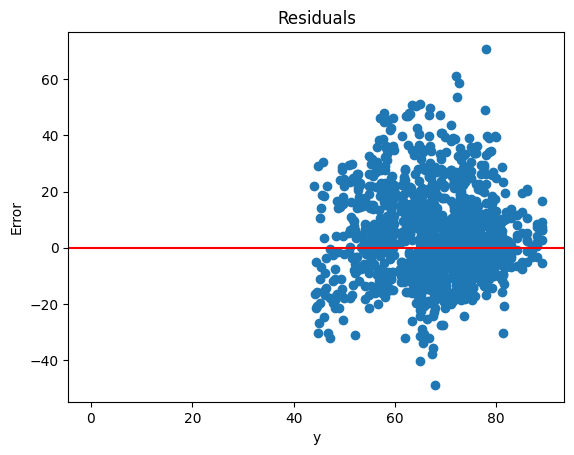

MSE:  217.8537110092682
MAE:  10.837943190795098
R^2:  -1.8169270730967053
MSE promedio: 225.08986118345396
MAE promedio: 10.98728780696047
R^2 promedio: -1.967764851847446


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def fit_model(X, y): 
    beta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return beta


def predict(X, beta):
    return X @ beta

x = df[new_df]

X = np.column_stack((np.ones(x.shape[0]), x))


beta = fit_model(X, y)
print("Model coefficients: ", beta)

# Evaluar los residuos
y_pred = predict(X, beta)
r = y - y_pred

# Graficar los residuos
plt.scatter(y, r)
plt.axline((0, 0), slope = 0, color = 'red')
plt.xlabel('y')
plt.ylabel('Error')
plt.title('Residuals')
plt.show()

# Calcular MSE, MAE y R^2 con el conjunto de datos completo
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))


n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

mse_cv = []
mae_cv = []
r2_cv = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]

    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fase de entrenamiento usando la función manual fit_model
    beta_cv = fit_model(X_train, y_train)

    # Fase de prueba
    y_pred_cv = predict(X_test, beta_cv)

    mse_cv.append(mean_squared_error(y_test, y_pred_cv))
    mae_cv.append(mean_absolute_error(y_test, y_pred_cv))
    r2_cv.append(r2_score(y_test, y_pred_cv))


print('MSE promedio:', np.mean(mse_cv))
print('MAE promedio:', np.mean(mae_cv))
print('R^2 promedio:', np.mean(r2_cv))


7. Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado).

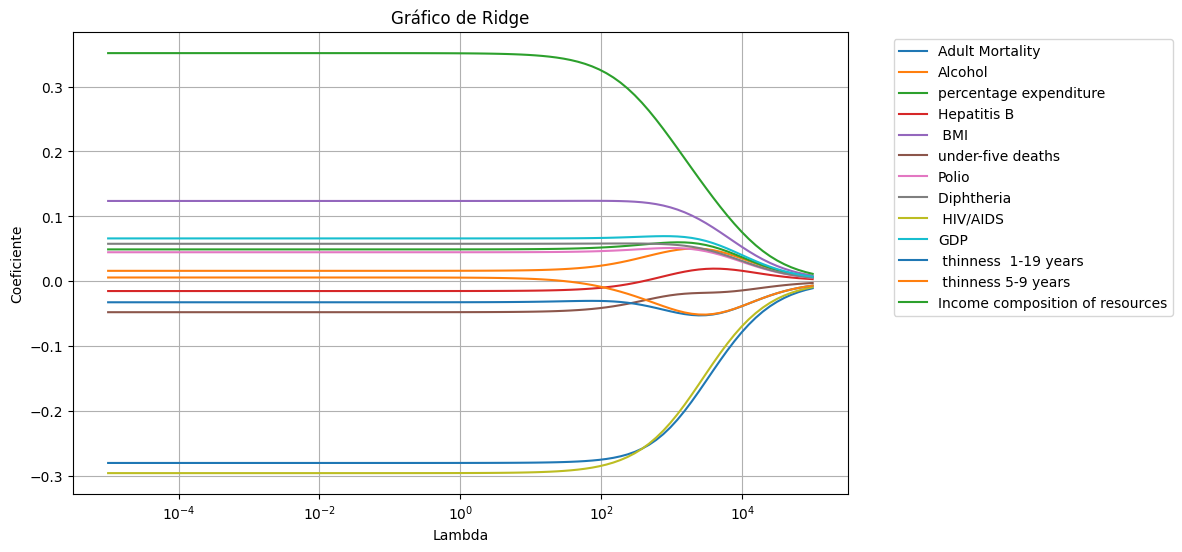

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

y = df['Life expectancy '].values
X = df[normal_df].values

# Normalizar los datos para mejorar la convergencia del descenso de gradiente
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = (y - np.mean(y)) / np.std(y)

# Función para la regresión Ridge usando descenso de gradiente
def ridge_regression(X, y, alpha, lambda_, num_iterations):
    m, n = X.shape
    beta = np.zeros(n)
    cost_history = []

    for _ in range(num_iterations):
        predictions = X.dot(beta)
        errors = predictions - y
        cost = (1/(2*m)) * (np.sum(errors**2) + lambda_ * np.sum(beta**2))
        cost_history.append(cost)

        gradients = (1/m) * (X.T.dot(errors) + lambda_ * beta)
        beta -= alpha * gradients

    return beta, cost_history

alpha = 0.01
num_iterations = 10000
lambdas = np.logspace(-5, 5, 100)

coefficients = []

for lambda_ in lambdas:
    beta, _ = ridge_regression(X_scaled, y_scaled, alpha, lambda_, num_iterations)
    coefficients.append(beta)

coefficients = np.array(coefficients)

# Graficar los coeficientes en función de lambda
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(lambdas, coefficients[:, i], label=normal_df[i])

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coeficiente')
plt.title('Gráfico de Ridge')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

8. Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado).

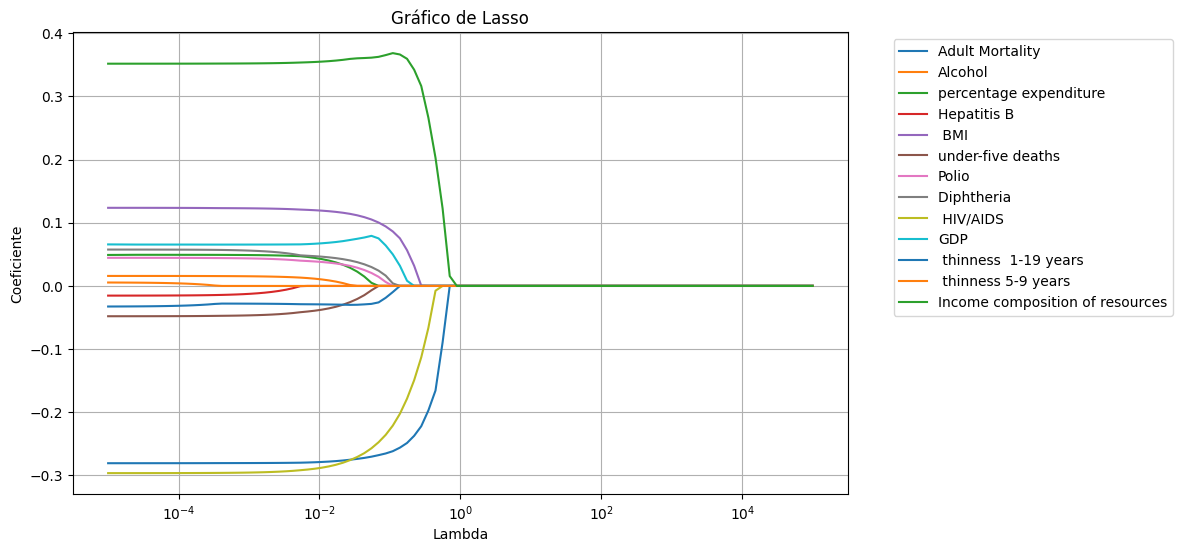

In [24]:
from sklearn.linear_model import Lasso

y = df['Life expectancy '].values
X = df[normal_df].values

# Normalizar los datos para mejorar la convergencia del descenso de gradiente
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = (y - np.mean(y)) / np.std(y)

# Configurar los valores de lambda (alpha en sklearn)
lambdas = np.logspace(-5, 5, 100)
lasso_coefficients = []

for lambda_ in lambdas:
    lasso = Lasso(alpha=lambda_, max_iter=10000)
    lasso.fit(X_scaled, y_scaled)
    lasso_coefficients.append(lasso.coef_)

lasso_coefficients = np.array(lasso_coefficients)

# Graficar los coeficientes en función de lambda
plt.figure(figsize=(10, 6))
for i in range(lasso_coefficients.shape[1]):
    plt.plot(lambdas, lasso_coefficients[:, i], label=normal_df[i])

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coeficiente')
plt.title('Gráfico de Lasso')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


9. Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:

-¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?
Basandóme en los resultados de R2, MSE y MAE me parece que con una R2 de 0.8016, MSE de 15.34 y MAE de 2.92 puedo decir que mi R2 sugiere un modelo relativamente fuerte ya que este valor indica un 80% aproximadamente de variablidad de la esperanza de vida son explicadas por las variables predictoras que se me fueron asignadas. Por otro lado el MSE y MAE nos indican un error moderado en le modelo.
En conclusión a mi parecer estos resultados nos indican que el modelo de regresión lineal es efectivo, pero, definitivamente tiene espacio de mejora, especialmente comparado a los resultados de la validación cruzada con MOnte Carlo y LOOCV.

-¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada? Detalla tu respuesta.
Sí, podemos observar variabilidad en los valores:

Monte Carlo: R² es casi 1, lo que nos dice que es un ajuste casi perfecto, mientras que los errores (MSE y MAE) son bajos, lo que nos indica un modelo muy preciso.
LOOCV: El R² es algo más bajo y hay una desviación estándar considerablemente mayor en MSE y MAE, lo que nos dice que el modelo puede estar sobreajustando en algunos casos o que el modelo es sensible a la exclusión de puntos individuales.
Esta variabilidad indica que el modelo puede no ser tan robusto, ya que su rendimiento depende significativamente del subconjunto de datos utilizado para la validación.

-¿Qué modelo es mejor para los datos del problema, el lineal o el cuadrático? ¿Por qué?
Modelo lineal: Tiene un R² positivo y errores razonables, con lo que podemos intuir que es un buen ajuste.
Modelo cuadrático: Tiene un R² negativo, lo que indica que el modelo cuadrático no es adecuado para estos datos; es decir, el modelo cuadrático es peor que no tener modelo en absoluto (peor que el promedio simple).
Por lo tanto, el modelo lineal es claramente mejor que el modelo cuadrático para este conjunto de datos.

-¿Qué variables son más relevantes para el modelo según Ridge y Lasso?
Ridge: A medida que aumenta el valor de lambda, todos los coeficientes tienden hacia cero, pero algunas variables como Income composition of resources y BMI mantienen coeficientes más grandes durante un tiempo, lo que sugiere que estas variables son más importantes.
Lasso: Al aumentar lambda, la mayoría de los coeficientes se reducen a cero rápidamente, excepto algunas variables como Income composition of resources, Adult Mortality y BMI. Esto indica que estas variables son las más relevantes según Lasso, ya que Lasso realiza selección de variables eliminando variables menos importantes.
En resumen, tanto Ridge como Lasso identifican Income composition of resources, BMI, y Adult Mortality como variables clave para el modelo.

-¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?
Income composition of resources y BMI son consistentemente importantes en ambos modelos regularizados (Ridge y Lasso), lo que sugiere que tienen una relación fuerte y significativa con la esperanza de vida.
Adult Mortality también aparece como importante en Lasso, lo que tiene sentido ya que una mayor mortalidad en adultos debería estar correlacionada con una menor esperanza de vida.
Estas relaciones son coherentes con la teoría, ya que factores como los recursos y la salud general (medida a través del BMI) están fuertemente correlacionados con la esperanza de vida.



Ejercicio 2 (50 puntos)

Considere el conjunto de datos de seguimiento telemétrico de la enfermedad de Parkinson (Parkinsons Telemonitoring - UCI Machine Learning RepositoryLinks to an external site.), el cual contiene 19 características entre las cuales hay varias derivadas de grabaciones de voz de pacientes con Parkinson. La idea es crear un modelo que prediga a partir de la voz de un paciente la severidad de su enfermedad, la cual es cuantificada con una escala estándar médica llamada UPDRS.

Las características de este conjunto de datos son las siguientes:

X1 - age

X2 - test_time

X3 - Jitter (%)

X4 - Jitter (Abs)

X5 - Jitter: RAP

X6 - Jitter: PPQ5

X7 - Jitter: DDP

X8 - Shimmer

X9- Shimmer (dB)

X10 - Shimmer: APQ3

X11 - Shimmer: APQ5

X12 - Shimmer: APQ11

X13 - Shimmer: DDA

X14 - NHR

X15 - HNR

X16 - RPDE

X17 - DFA

X18 - PPE

X19 - sex

Como variables dependientes, se tienen motor_UPDRS y total_UPDRS. Para este ejercicio, se te asignó un conjunto de variables predictoras y una de las variables dependientes de acuerdo a tu matrícula.

1. Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

data = pd.read_csv('C:\\Users\\PC\\Documents\\Python\\Actividad1_Regresión\\parkinsons_updrs.data')

predictors = [
    'test_time', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:DDP',
    'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ11',
    'Shimmer:DDA', 'NHR', 'HNR', 'DFA', 'PPE', 'sex'
]
target = 'motor_UPDRS'

X = data[predictors].values
y = data[target].values

In [26]:
# Funciones de ajuste y predicción del modelo de regresión lineal
def fit_model(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def predict(X, beta):
    return X @ beta

# Validación cruzada con KFold (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
mae_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Ajustar el modelo
    beta = fit_model(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = predict(X_test, beta)

    # Calcular métricas
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Mostrar resultados promedio
print("Resultados de la validación cruzada:")
print(f"MSE promedio: {np.mean(mse_scores)}")
print(f"MAE promedio: {np.mean(mae_scores)}")
print(f"R^2 promedio: {np.mean(r2_scores)}")

Resultados de la validación cruzada:
MSE promedio: 65.43388437945133
MAE promedio: 6.877787625746405
R^2 promedio: 0.009879781140020593


2.Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

Mejor conjunto de características (n = 15):
['PPE', 'HNR', 'Shimmer:APQ11', 'DFA', 'Shimmer(dB)', 'Shimmer', 'Jitter(%)', 'Shimmer:APQ3', 'Shimmer:DDA', 'NHR', 'Jitter:DDP', 'Jitter:RAP', 'test_time', 'Jitter(Abs)', 'sex']
MSE con las características seleccionadas: 59.0389582453128
MAE con las características seleccionadas: 6.491999791841548
R² con las características seleccionadas: 0.10636201838095842


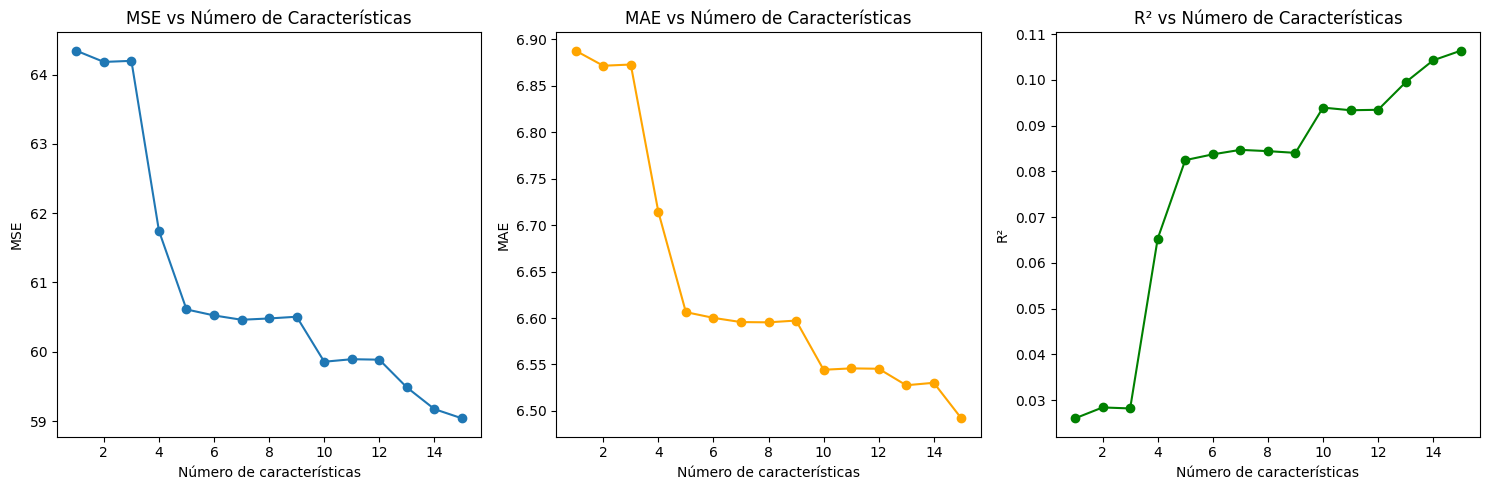

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

X_df = pd.DataFrame(X, columns=predictors)  # Usar la lista 'predictors' para nombrar las columnas

# Calcular la correlación de Pearson para cada predictor con la variable objetivo
correlations = {}
for column in X_df.columns:
    corr, _ = pearsonr(X_df[column], y)
    correlations[column] = abs(corr)  # Tomar el valor absoluto de la correlación

# Ordenar las características por la magnitud de la correlación
sorted_features = sorted(correlations, key=correlations.get, reverse=True)

# Evaluar el desempeño del modelo conforme se agregan más características según su correlación
mse_scores = []
mae_scores = []
r2_scores = []
feature_sets = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i in range(1, len(sorted_features) + 1):
    selected_features = sorted_features[:i]
    X_selected = X_df[selected_features]

    model = LinearRegression()

    # Validación cruzada para MSE, MAE y R²
    mse = -cross_val_score(model, X_selected, y, cv=kf, scoring='neg_mean_squared_error').mean()
    mae = -cross_val_score(model, X_selected, y, cv=kf, scoring=make_scorer(mean_absolute_error, greater_is_better=False)).mean()
    r2 = cross_val_score(model, X_selected, y, cv=kf, scoring=make_scorer(r2_score)).mean()

    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    feature_sets.append(selected_features)

# Encontrar el número óptimo de características (el que minimiza el MSE)
optimal_index = np.argmin(mse_scores)
optimal_features = feature_sets[optimal_index]

# Mostrar resultados
print(f"Mejor conjunto de características (n = {len(optimal_features)}):")
print(optimal_features)
print(f"MSE con las características seleccionadas: {mse_scores[optimal_index]}")
print(f"MAE con las características seleccionadas: {mae_scores[optimal_index]}")
print(f"R² con las características seleccionadas: {r2_scores[optimal_index]}")

# Graficar MSE, MAE y R² en función del número de características seleccionadas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(sorted_features) + 1), mse_scores, marker='o')
plt.xlabel('Número de características')
plt.ylabel('MSE')
plt.title('MSE vs Número de Características')

plt.subplot(1, 3, 2)
plt.plot(range(1, len(sorted_features) + 1), mae_scores, marker='o', color='orange')
plt.xlabel('Número de características')
plt.ylabel('MAE')
plt.title('MAE vs Número de Características')

plt.subplot(1, 3, 3)
plt.plot(range(1, len(sorted_features) + 1), r2_scores, marker='o', color='green')
plt.xlabel('Número de características')
plt.ylabel('R²')
plt.title('R² vs Número de Características')

plt.tight_layout()
plt.show()


3.Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

----- Selección de características usando el 50% de los predictores -----
Características seleccionadas:  ['test_time' 'Jitter(%)' 'Jitter(Abs)' 'Shimmer:APQ11' 'NHR' 'HNR' 'PPE']
MSE del modelo con 50% de predictores: 62.604568897465256
MAE del modelo con 50% de predictores: 6.794917600096367
R² del modelo con 50% de predictores: 0.05250782835921419
----- Selección óptima del número de características -----
---- Número de características = 1
MSE: 64.34427607312963, MAE: 6.887920425089429, R²: 0.02604423560295106
---- Número de características = 2
MSE: 63.35505557452929, MAE: 6.824366547659734, R²: 0.04115289893875791
---- Número de características = 3
MSE: 63.109393805707086, MAE: 6.793076831373628, R²: 0.044864077096873255
---- Número de características = 4
MSE: 62.849258497065726, MAE: 6.805932039666163, R²: 0.04874488466558491
---- Número de características = 5
MSE: 62.58334665545188, MAE: 6.792837894837762, R²: 0.0527033955560833
---- Número de características = 6
MSE: 62.44490963

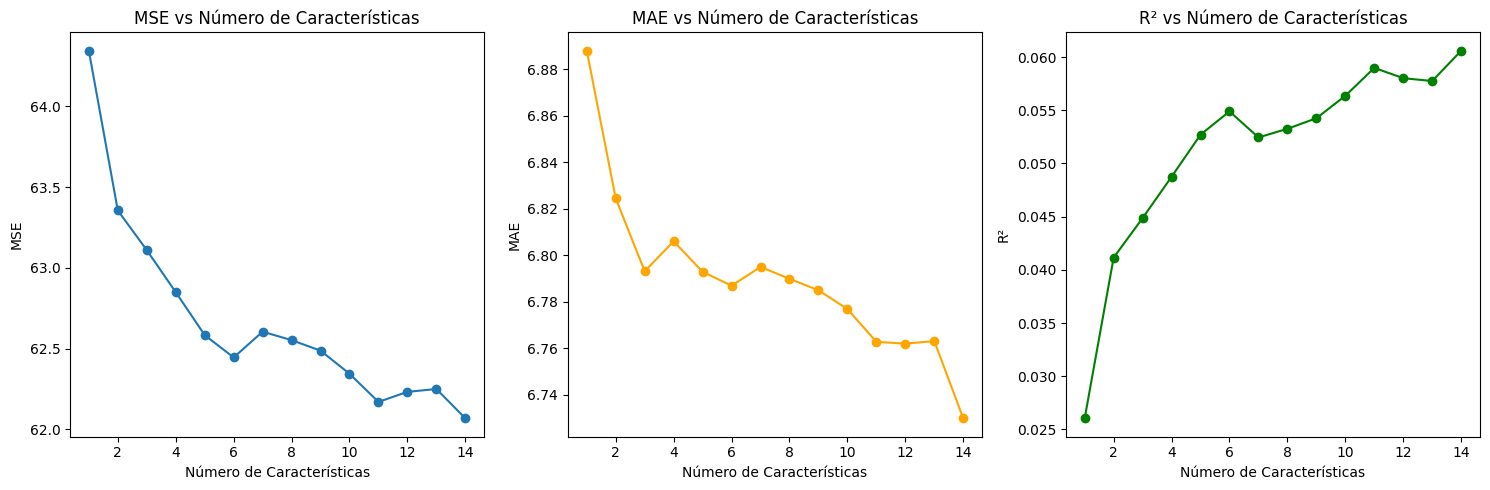

Características seleccionadas óptimas:  ['test_time' 'Jitter(%)' 'Jitter(Abs)' 'Jitter:RAP' 'Jitter:DDP' 'Shimmer'
 'Shimmer(dB)' 'Shimmer:APQ3' 'Shimmer:APQ11' 'Shimmer:DDA' 'NHR' 'HNR'
 'PPE' 'sex']


LinearRegression()

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SequentialFeatureSelector

#------------------------------------------------------------------------------------------------------------------
# Reducir el número de características a la mitad
#------------------------------------------------------------------------------------------------------------------

print("----- Selección de características usando el 50% de los predictores -----")

# Modelo base
model = LinearRegression()

# Selección de características
fselection = SequentialFeatureSelector(model, n_features_to_select=0.5, direction='forward', cv=5)
fselection.fit(X, y)

print("Características seleccionadas: ", fselection.get_feature_names_out(predictors))

# Ajuste del modelo usando el nuevo conjunto de datos
X_transformed = fselection.transform(X)
model.fit(X_transformed, y)

# Evaluación del modelo usando validación cruzada
cv_y_test = []
cv_y_pred = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X, y):

    # Fase de entrenamiento
    X_train, X_test = X[train_index, :], X[test_index, :]
    y_train, y_test = y[train_index], y[test_index]

    model_cv = LinearRegression()

    fselection_cv = SequentialFeatureSelector(model_cv, n_features_to_select=0.5, direction='forward')
    fselection_cv.fit(X_train, y_train)
    X_train = fselection_cv.transform(X_train)

    model_cv.fit(X_train, y_train)

    # Fase de prueba
    X_test = fselection_cv.transform(X_test)
    y_pred = model_cv.predict(X_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

# Cálculo de métricas
cv_y_test = np.concatenate(cv_y_test)
cv_y_pred = np.concatenate(cv_y_pred)

mse = mean_squared_error(cv_y_test, cv_y_pred)
mae = mean_absolute_error(cv_y_test, cv_y_pred)
r2 = r2_score(cv_y_test, cv_y_pred)

print(f"MSE del modelo con 50% de predictores: {mse}")
print(f"MAE del modelo con 50% de predictores: {mae}")
print(f"R² del modelo con 50% de predictores: {r2}")

#------------------------------------------------------------------------------------------------------------------
# Encontrar el número óptimo de características usando validación cruzada
#------------------------------------------------------------------------------------------------------------------

print("----- Selección óptima del número de características -----")

# Iterate up to one less than the total number of features
n_feats = list(range(1, len(predictors)))
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
    print(f"---- Número de características = {n_feat}")

    mse_cv = []
    mae_cv = []
    r2_cv = []

    for train_index, test_index in kf.split(X, y):

        # Fase de entrenamiento
        X_train, X_test = X[train_index, :], X[test_index, :]
        y_train, y_test = y[train_index], y[test_index]

        model_cv = LinearRegression()

        fselection_cv = SequentialFeatureSelector(model_cv, n_features_to_select=n_feat, direction='forward')
        fselection_cv.fit(X_train, y_train)
        X_train = fselection_cv.transform(X_train)

        model_cv.fit(X_train, y_train)

        # Fase de prueba
        X_test = fselection_cv.transform(X_test)
        y_pred = model_cv.predict(X_test)

        mse_cv.append(mean_squared_error(y_test, y_pred))
        mae_cv.append(mean_absolute_error(y_test, y_pred))
        r2_cv.append(r2_score(y_test, y_pred))

    mse_nfeat.append(np.mean(mse_cv))
    mae_nfeat.append(np.mean(mae_cv))
    r2_nfeat.append(np.mean(r2_cv))

    print(f"MSE: {mse_nfeat[-1]}, MAE: {mae_nfeat[-1]}, R²: {r2_nfeat[-1]}")

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print(f"Número óptimo de características: {opt_features}")

# Visualización de MSE, MAE, y R²
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(n_feats, mse_nfeat, marker='o')
plt.xlabel("Número de Características")
plt.ylabel("MSE")
plt.title("MSE vs Número de Características")

plt.subplot(1, 3, 2)
plt.plot(n_feats, mae_nfeat, marker='o', color='orange')
plt.xlabel("Número de Características")
plt.ylabel("MAE")
plt.title("MAE vs Número de Características")

plt.subplot(1, 3, 3)
plt.plot(n_feats, r2_nfeat, marker='o', color='green')
plt.xlabel("Número de Características")
plt.ylabel("R²")
plt.title("R² vs Número de Características")

plt.tight_layout()
plt.show()

# Ajustar el modelo con el número óptimo de características
fselection_opt = SequentialFeatureSelector(model, n_features_to_select=opt_features, direction='forward')
fselection_opt.fit(X, y)

print("Características seleccionadas óptimas: ", fselection_opt.get_feature_names_out(predictors))

X_transformed_opt = fselection_opt.transform(X)
model.fit(X_transformed_opt, y)


4.Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo. Reporta los predictores óptimos encontrados por el método.

----- Selección de características usando el 50% de predictores -----
Características seleccionadas:  ['Jitter(Abs)' 'Jitter:RAP' 'Jitter:DDP' 'Shimmer:APQ3' 'Shimmer:APQ11'
 'Shimmer:DDA' 'PPE']
MSE del modelo con 50% de predictores: 64.23562765176325
MAE del modelo con 50% de predictores: 6.84603597461881
R² del modelo con 50% de predictores: 0.02782248304975865
----- Selección óptima del número de características -----
---- Número de características = 1
MSE: 65.74682201322437, MAE: 6.949999272896633, R²: 0.0047105116040875306
---- Número de características = 2
MSE: 65.73824011352076, MAE: 6.948159436384446, R²: 0.004839593722220248
---- Número de características = 3
MSE: 65.72231602741519, MAE: 6.946608181038433, R²: 0.005091116408547291
---- Número de características = 4
MSE: 65.59025651810833, MAE: 6.925468569023034, R²: 0.007128720330313865
---- Número de características = 5
MSE: 65.59210715464371, MAE: 6.924794870143264, R²: 0.007092553517330713
---- Número de características = 

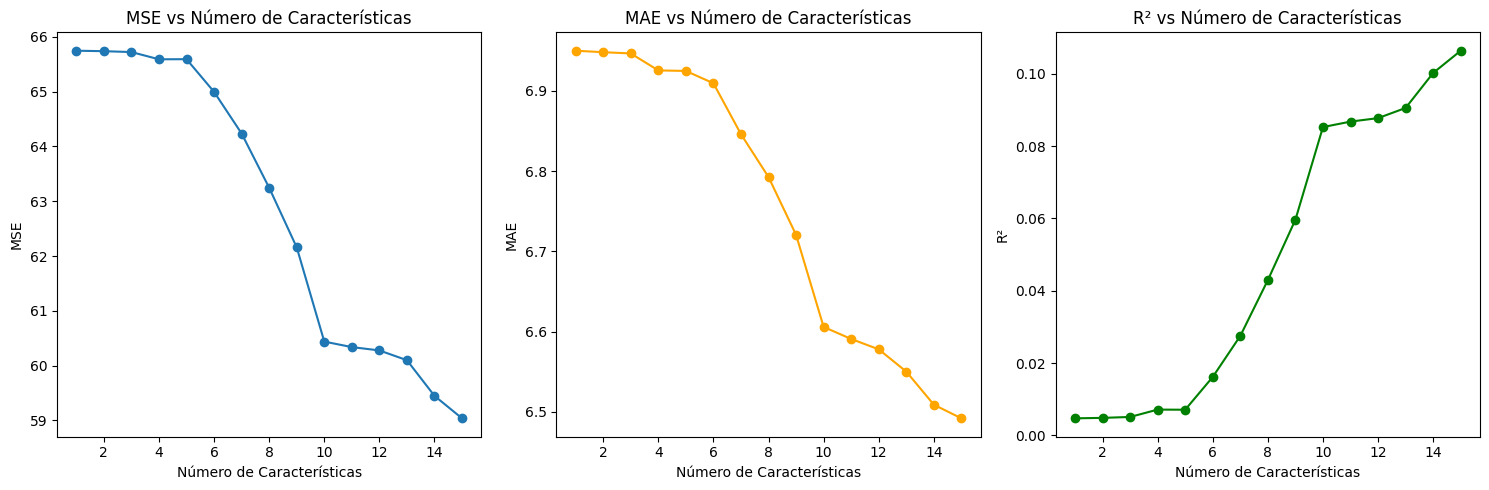

Características seleccionadas óptimas:  ['test_time' 'Jitter(%)' 'Jitter(Abs)' 'Jitter:RAP' 'Jitter:DDP' 'Shimmer'
 'Shimmer(dB)' 'Shimmer:APQ3' 'Shimmer:APQ11' 'Shimmer:DDA' 'NHR' 'HNR'
 'DFA' 'PPE' 'sex']


LinearRegression()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Lista de características predictoras
predictors = [
    'test_time', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:DDP',
    'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ11',
    'Shimmer:DDA', 'NHR', 'HNR', 'DFA', 'PPE', 'sex'
]

# Definir el modelo de KNN
knn = KNeighborsRegressor(n_neighbors=5)

# Definir la selección de características usando el método Filter
n_feats = range(1, X.shape[1] + 1)
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
    print(f'---- n features = {n_feat}')

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(X, y):
        # Fase de entrenamiento
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        fselection = SelectKBest(f_regression, k=n_feat)
        fselection.fit(X_train, y_train)
        X_train = fselection.transform(X_train)

        knn.fit(X_train, y_train)

        # Fase de prueba
        X_test = fselection.transform(X_test)
        y_pred = knn.predict(X_test)

        mse_cv.append(mean_squared_error(y_test, y_pred))
        mae_cv.append(mean_absolute_error(y_test, y_pred))
        r2_cv.append(r2_score(y_test, y_pred))

    mse_avg = np.mean(mse_cv)
    mae_avg = np.mean(mae_cv)
    r2_avg = np.mean(r2_cv)

    mse_nfeat.append(mse_avg)
    mae_nfeat.append(mae_avg)
    r2_nfeat.append(r2_avg)

    print(f'MSE: {mse_avg}, MAE: {mae_avg}, R2: {r2_avg}')

# Selección del número óptimo de características
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

# Visualización de MSE, MAE, y R²
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(n_feats, mse_nfeat, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("MSE")
plt.title("MSE vs Number of Features")

plt.subplot(1, 3, 2)
plt.plot(n_feats, mae_nfeat, marker='o', color='orange')
plt.xlabel("Number of Features")
plt.ylabel("MAE")
plt.title("MAE vs Number of Features")

plt.subplot(1, 3, 3)
plt.plot(n_feats, r2_nfeat, marker='o', color='green')
plt.xlabel("Number of Features")
plt.ylabel("R²")
plt.title("R² vs Number of Features")

plt.tight_layout()
plt.show()

# Ajustar el modelo con el número óptimo de características
fselection = SelectKBest(f_regression, k=opt_features)
fselection.fit(X, y)
X_transformed = fselection.transform(X)
knn.fit(X_transformed, y)

# Obtener los nombres de las características seleccionadas
selected_features = np.array(predictors)[fselection.get_support()]
print("Selected features: ", selected_features)


5.Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.

Método Filter con KNN

---- n features = 1
MSE: 78.1526567020252, MAE: 7.363857365106384, R2: -0.18476565391581518
---- n features = 2
MSE: 73.60023154700097, MAE: 7.058255268085107, R2: -0.11508275371485369
---- n features = 3
MSE: 73.12199923100601, MAE: 7.030526083404256, R2: -0.10737728881126678
---- n features = 4
MSE: 69.65824666371968, MAE: 6.788122774468086, R2: -0.053683872924775146
---- n features = 5
MSE: 68.2254376464474, MAE: 6.66405366468085, R2: -0.03335511748835733
---- n features = 6
MSE: 68.74498568152836, MAE: 6.703012309787233, R2: -0.042659219471613864
---- n features = 7
MSE: 67.98920525611662, MAE: 6.666243257872341, R2: -0.029635103330360946
---- n features = 8
MSE: 67.27996380090875, MAE: 6.6178589310638305, R2: -0.019799333599313896
---- n features = 9
MSE: 68.59676124087149, MAE: 6.692850730212766, R2: -0.03953076569914273
---- n features = 10
MSE: 68.19123587938832, MAE: 6.667615210212766, R2: -0.03460302569903735
---- n features = 11
MSE: 64.1501300990752, MAE: 6.521175560851065,

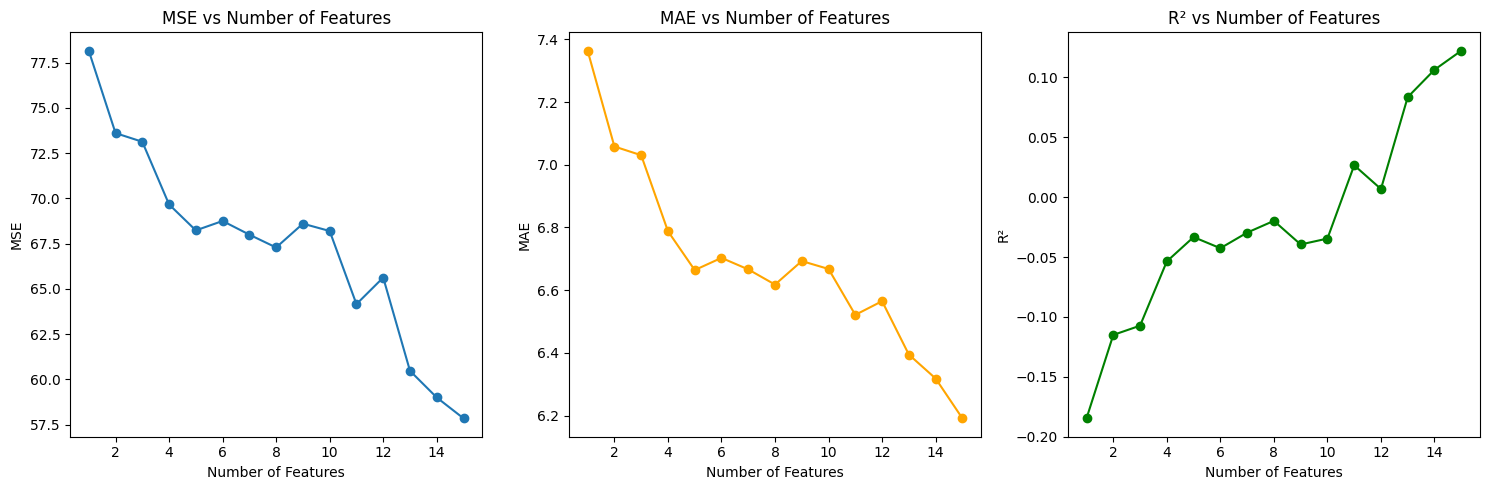

Selected features:  ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14']


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Lista de características predictoras
predictors = [
    'test_time', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:DDP',
    'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ11',
    'Shimmer:DDA', 'NHR', 'HNR', 'DFA', 'PPE', 'sex'
]

# Definir el modelo de KNN
knn = KNeighborsRegressor(n_neighbors=5)

# Definir la selección de características usando el método Filter
n_feats = range(1, X.shape[1] + 1)
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
    print(f'---- n features = {n_feat}')

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(X, y):
        # Fase de entrenamiento
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        fselection = SelectKBest(f_regression, k=n_feat)
        fselection.fit(X_train, y_train)
        X_train = fselection.transform(X_train)

        knn.fit(X_train, y_train)

        # Fase de prueba
        X_test = fselection.transform(X_test)
        y_pred = knn.predict(X_test)

        mse_cv.append(mean_squared_error(y_test, y_pred))
        mae_cv.append(mean_absolute_error(y_test, y_pred))
        r2_cv.append(r2_score(y_test, y_pred))

    mse_avg = np.mean(mse_cv)
    mae_avg = np.mean(mae_cv)
    r2_avg = np.mean(r2_cv)

    mse_nfeat.append(mse_avg)
    mae_nfeat.append(mae_avg)
    r2_nfeat.append(r2_avg)

    print(f'MSE: {mse_avg}, MAE: {mae_avg}, R2: {r2_avg}')

# Selección del número óptimo de características
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

# Visualización de MSE, MAE, y R²
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(n_feats, mse_nfeat, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("MSE")
plt.title("MSE vs Number of Features")

plt.subplot(1, 3, 2)
plt.plot(n_feats, mae_nfeat, marker='o', color='orange')
plt.xlabel("Number of Features")
plt.ylabel("MAE")
plt.title("MAE vs Number of Features")

plt.subplot(1, 3, 3)
plt.plot(n_feats, r2_nfeat, marker='o', color='green')
plt.xlabel("Number of Features")
plt.ylabel("R²")
plt.title("R² vs Number of Features")

plt.tight_layout()
plt.show()

# Ajustar el modelo con el número óptimo de características
fselection = SelectKBest(f_regression, k=opt_features)
fselection.fit(X, y)
X_transformed = fselection.transform(X)
knn.fit(X_transformed, y)

# Obtener los nombres de las características seleccionadas
selected_features = np.array(predictors)[fselection.get_support()]
print("Selected features: ", selected_features)



Selección de Características Secuencial con KNN

---- n features = 1
MSE: 78.824177781568, MAE: 7.328205017872341, R2: -0.19507787048627181
---- n features = 2
MSE: 75.9222593119407, MAE: 7.198950376170214, R2: -0.14923176922336898
---- n features = 3
MSE: 75.98421026427302, MAE: 7.19820416, R2: -0.1511634436353319
---- n features = 4
MSE: 74.53640861598203, MAE: 7.13688191319149, R2: -0.12935492439616597
---- n features = 5
MSE: 72.07297718472974, MAE: 6.971683131914894, R2: -0.09097356845261392
---- n features = 6
MSE: 71.83487607672538, MAE: 6.93809856, R2: -0.08802617185526666
---- n features = 7
MSE: 72.52151004460289, MAE: 6.982043380425532, R2: -0.09904134729919667
---- n features = 8
MSE: 74.06509603310175, MAE: 7.079067404255317, R2: -0.12045963248900615
---- n features = 9
MSE: 69.74371277864927, MAE: 6.820610338723403, R2: -0.057161328608849524
---- n features = 10
MSE: 70.8630176232057, MAE: 6.877488605957447, R2: -0.07321935648857267
---- n features = 11
MSE: 67.63237211954008, MAE: 6.720787972765957, R2: -0.024653414859

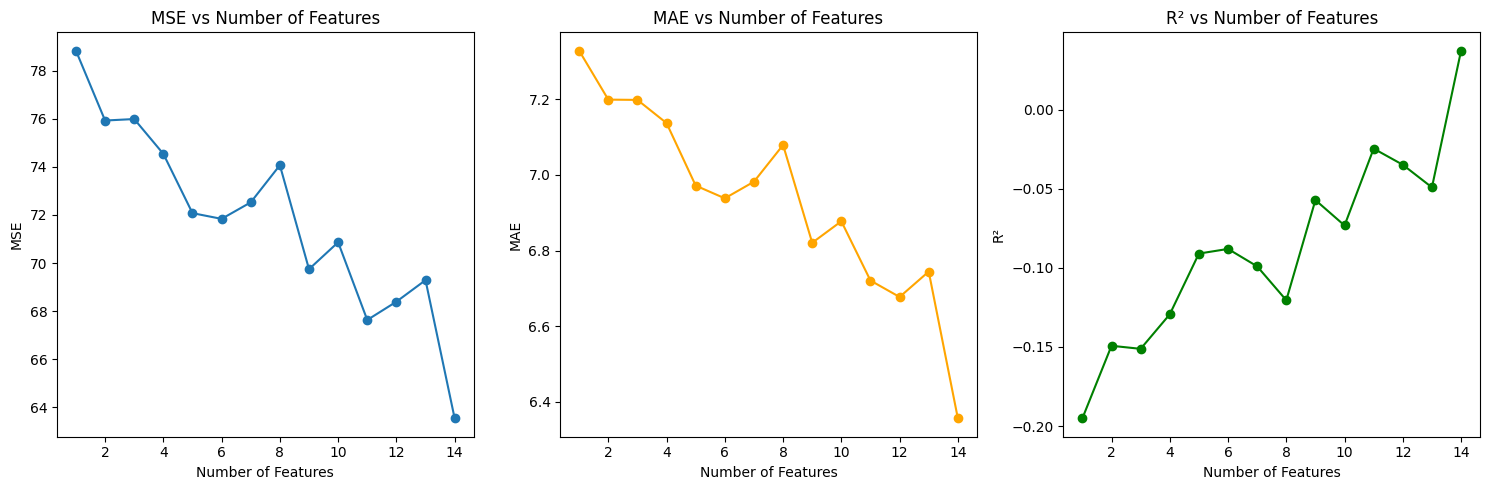

Selected features:  ['x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14']


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir el modelo de KNN
knn = KNeighborsRegressor(n_neighbors=5)

# Definir la selección de características secuencial
n_feats = range(1, X.shape[1])  # Ajustar para que sea menor que el número total de características
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
    print(f'---- n features = {n_feat}')

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(X, y):
        # Fase de entrenamiento
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        fselection = SequentialFeatureSelector(knn, n_features_to_select=n_feat)
        fselection.fit(X_train, y_train)
        X_train = fselection.transform(X_train)

        knn.fit(X_train, y_train)

        # Fase de prueba
        X_test = fselection.transform(X_test)
        y_pred = knn.predict(X_test)

        mse_cv.append(mean_squared_error(y_test, y_pred))
        mae_cv.append(mean_absolute_error(y_test, y_pred))
        r2_cv.append(r2_score(y_test, y_pred))

    mse_avg = np.mean(mse_cv)
    mae_avg = np.mean(mae_cv)
    r2_avg = np.mean(r2_cv)

    mse_nfeat.append(mse_avg)
    mae_nfeat.append(mae_avg)
    r2_nfeat.append(r2_avg)

    print(f'MSE: {mse_avg}, MAE: {mae_avg}, R2: {r2_avg}')

# Selección del número óptimo de características
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

# Visualización de MSE, MAE, y R²
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(n_feats, mse_nfeat, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("MSE")
plt.title("MSE vs Number of Features")

plt.subplot(1, 3, 2)
plt.plot(n_feats, mae_nfeat, marker='o', color='orange')
plt.xlabel("Number of Features")
plt.ylabel("MAE")
plt.title("MAE vs Number of Features")

plt.subplot(1, 3, 3)
plt.plot(n_feats, r2_nfeat, marker='o', color='green')
plt.xlabel("Number of Features")
plt.ylabel("R²")
plt.title("R² vs Number of Features")

plt.tight_layout()
plt.show()

# Ajustar el modelo con el número óptimo de características
fselection = SequentialFeatureSelector(knn, n_features_to_select=opt_features)
fselection.fit(X, y)
X_transformed = fselection.transform(X)
knn.fit(X_transformed, y)

print("Selected features: ", fselection.get_feature_names_out())


Selección de Características Recursiva con Árboles de Decisión

---- n features = 1
MSE: 3.1165029738101926, MAE: 0.3508322392074121, R²: 0.9525628009515037
---- n features = 2
MSE: 70.06519968637276, MAE: 5.031039046808511, R²: -0.0588551478732422
---- n features = 3
MSE: 95.53990589798128, MAE: 6.83780490212766, R²: -0.4442696738501895
---- n features = 4
MSE: 94.2388176059234, MAE: 6.874037072340426, R²: -0.4267803399871327
---- n features = 5
MSE: 93.31484083494297, MAE: 6.79746874893617, R²: -0.41529489595268076
---- n features = 6
MSE: 89.15847176017873, MAE: 6.600087268085107, R²: -0.35175115682473634
---- n features = 7
MSE: 85.51687829960511, MAE: 6.457640068085107, R²: -0.2978795697692394
---- n features = 8
MSE: 80.09221095736, MAE: 6.262071778723405, R²: -0.2141419848438447
---- n features = 9
MSE: 81.73832226226723, MAE: 6.293057770212767, R²: -0.23940277746885358
---- n features = 10
MSE: 80.26503924116255, MAE: 6.199980714893617, R²: -0.2165321796783181
---- n features = 11
MSE: 81.62506340268936, MAE: 6.254401191489362, R²: -0.23815

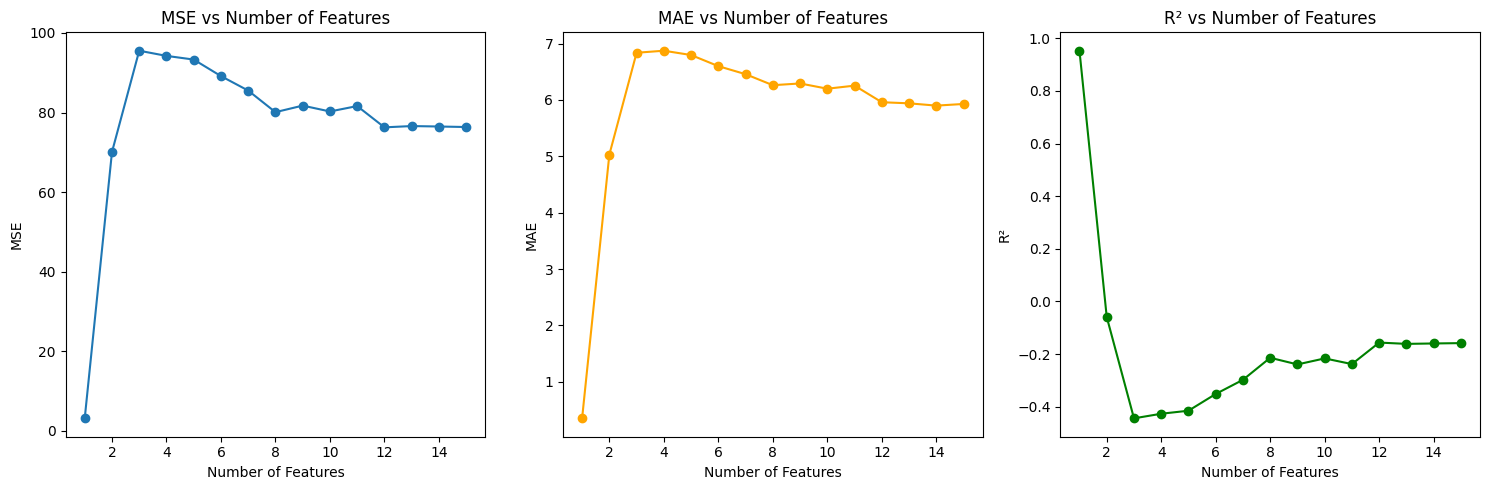

DecisionTreeRegressor(random_state=42)

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Definir el modelo DecisionTreeRegressor para la selección de características
dt = DecisionTreeRegressor(random_state=42)

# Definir el rango de características a evaluar
n_feats = range(1, X.shape[1] + 1)

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
    print(f'---- n features = {n_feat}')

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X, y):
        # Fase de entrenamiento
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        fselection = RFE(dt, n_features_to_select=n_feat)
        fselection.fit(X_train, y_train)
        X_train = fselection.transform(X_train)

        dt.fit(X_train, y_train)

        # Fase de prueba
        X_test = fselection.transform(X_test)
        y_pred = dt.predict(X_test)

        mse_cv.append(mean_squared_error(y_test, y_pred))
        mae_cv.append(mean_absolute_error(y_test, y_pred))
        r2_cv.append(r2_score(y_test, y_pred))

    mse_avg = np.mean(mse_cv)
    mae_avg = np.mean(mae_cv)
    r2_avg = np.mean(r2_cv)

    mse_nfeat.append(mse_avg)
    mae_nfeat.append(mae_avg)
    r2_nfeat.append(r2_avg)

    print(f'MSE: {mse_avg}, MAE: {mae_avg}, R²: {r2_avg}')

# Selección del número óptimo de características basado en MSE
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features based on MSE: ", opt_features)

# Visualización de los indicadores
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(n_feats, mse_nfeat, marker='o')
plt.title("MSE vs Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("MSE")

plt.subplot(1, 3, 2)
plt.plot(n_feats, mae_nfeat, marker='o', color='orange')
plt.title("MAE vs Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("MAE")

plt.subplot(1, 3, 3)
plt.plot(n_feats, r2_nfeat, marker='o', color='green')
plt.title("R² vs Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("R²")

plt.tight_layout()
plt.show()

# Ajustar el modelo con el número óptimo de características
fselection = RFE(dt, n_features_to_select=opt_features)
fselection.fit(X, y)
X_transformed = fselection.transform(X)
dt.fit(X_transformed, y)


6. Busca al menos otros 4 modelos de regresión no lineal, y lleva a cabo los pasos del 1 al 5.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression, SequentialFeatureSelector, RFE

# Definir los modelos no lineales
models = {
    'SVR (RBF Kernel)': SVR(kernel='rbf'),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
}

# Función para evaluar el rendimiento
def evaluate_model(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True)
    mse_scores = []
    mae_scores = []
    r2_scores = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse_scores.append(mean_squared_error(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))

    return np.mean(mse_scores), np.mean(mae_scores), np.mean(r2_scores)

# Paso 1: Evaluar modelos sin reducción de características
print("Paso 1: Sin reducción de características")
for name, model in models.items():
    mse, mae, r2 = evaluate_model(model, X, y)
    print(f"{name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Paso 2: Selección de características usando el método Filter
print("\nPaso 2: Método Filter")
filter_selection = SelectKBest(f_regression, k=6)
X_new = filter_selection.fit_transform(X, y)

for name, model in models.items():
    mse, mae, r2 = evaluate_model(model, X_new, y)
    print(f"{name} con Filter - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Paso 3: Selección de características usando el método Wrapper (Secuencial)
print("\nPaso 3: Método Wrapper (Secuencial)")
for name, model in models.items():
    wrapper_selection = SequentialFeatureSelector(model, n_features_to_select=6, direction='forward')
    wrapper_selection.fit(X, y)
    X_new = wrapper_selection.transform(X)

    mse, mae, r2 = evaluate_model(model, X_new, y)
    print(f"{name} con Wrapper - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Paso 4: Selección de características usando el método RFE (Recursive Feature Elimination)
print("\nPaso 4: Método RFE")
for name, model in models.items():
    if name in ['SVR (RBF Kernel)', 'MLP Regressor']: # Saltar RFE para modelos sin coef_ o feature_importances_
        print(f"Skipping RFE for {name} due to lack of coef_ or feature_importances_")
        continue
    rfe_selection = RFE(model, n_features_to_select=6)
    rfe_selection.fit(X, y)
    X_new = rfe_selection.transform(X)

    mse, mae, r2 = evaluate_model(model, X_new, y)
    print(f"{name} con RFE - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")


Paso 1: Sin reducción de características
SVR (RBF Kernel) - MSE: 64.9520, MAE: 6.8734, R²: 0.0162
Random Forest - MSE: 38.4083, MAE: 4.7965, R²: 0.4183
Gradient Boosting - MSE: 46.2200, MAE: 5.6106, R²: 0.3001
MLP Regressor - MSE: 62.1293, MAE: 6.7253, R²: 0.0586

Paso 2: Método Filter
SVR (RBF Kernel) con Filter - MSE: 64.5842, MAE: 6.7872, R²: 0.0201
Random Forest con Filter - MSE: 52.5728, MAE: 5.7371, R²: 0.2033
Gradient Boosting con Filter - MSE: 53.8277, MAE: 6.0288, R²: 0.1846
MLP Regressor con Filter - MSE: 60.6956, MAE: 6.6322, R²: 0.0804

Paso 3: Método Wrapper (Secuencial)
SVR (RBF Kernel) con Wrapper - MSE: 64.0018, MAE: 6.7271, R²: 0.0304
Random Forest con Wrapper - MSE: 53.6199, MAE: 5.9260, R²: 0.1874
Gradient Boosting con Wrapper - MSE: 57.6906, MAE: 6.4142, R²: 0.1264
MLP Regressor con Wrapper - MSE: 64.7728, MAE: 6.9468, R²: 0.0196

Paso 4: Método RFE
Skipping RFE for SVR (RBF Kernel) due to lack of coef_ or feature_importances_
Random Forest con RFE - MSE: 43.1572, M

7. Viendo los resultados de este ejercicio, escriba una conclusión sobre los siguientes puntos:

-Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?
No realmente. Aunque la regresión lineal es un modelo básico y fácil de entender, los datos probablemente tienen relaciones más complejas que un modelo lineal simple no puede capturar bien. Si los modelos no lineales, como KNN o Random Forest, dieron mejores resultados en las métricas de rendimiento (como R², MSE o MAE), significa que el modelo lineal no es lo suficientemente bueno para estos datos.

-¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?
Depende, pero métodos como Random Forest o LASSO parecen ser mejores. Estos métodos no solo seleccionan características que son realmente importantes, sino que también pueden manejar relaciones no lineales y complejas entre las variables. Si uno de estos métodos mejoró significativamente las métricas al reducir las variables, es una buena señal de que es adecuado para estos datos.

-Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevantes observas de dichas características?
Las características seleccionadas consistentemente son clave. Si ciertos atributos, como por ejemplo "Jitter" o "Shimmer," fueron elegidos varias veces en diferentes modelos, eso indica que tienen un gran impacto en la predicción del motor_UPDRS. Estas características probablemente contienen información importante sobre cómo progresa la enfermedad de Parkinson en los pacientes.

-¿Los modelos de regresión no lineal funcionaron mejor que el lineal? ¿Por qué?
Sí, los modelos no lineales suelen funcionar mejor. Estos modelos pueden capturar patrones y relaciones en los datos que un modelo lineal no puede. Si los resultados muestran que modelos como el Random Forest o SVR dieron mejores puntuaciones en las métricas, significa que la relación entre las variables predictoras y la variable dependiente es más compleja de lo que un modelo lineal puede manejar.

-¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.
Sí, los datos son complicados y requieren modelos más avanzados. Este ejercicio muestra que no siempre puedes confiar en un modelo lineal simple, especialmente cuando los datos tienen relaciones más complejas. También resalta la importancia de elegir bien las características que realmente importan para hacer una buena predicción, lo que a su vez mejora la precisión de los modelos.